### <span style="color:#A28C15; font-size:2.5em;"> 📊 Bank Marketing Campaign Analysis and Prediction </span>


# 📊 **Term Deposit Subscription - Client Behavior Analysis Project**

## 📝 **Project Overview**
In the world of modern banking, where customers have access to endless financial products, understanding client behavior is crucial. This dataset encapsulates the story of a bank’s direct marketing campaign, where personalized outreach to clients aims to promote term deposits. The challenge lies in identifying which clients are most likely to subscribe.

### ***What is a Term Deposit?***

A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time

## ***Background and Context:***
This dataset contains data collected from direct marketing campaigns of a Portuguese bank. These campaigns aim to promote term deposits by contacting clients through phone calls.
## ***Problem Statement:***
The key problem is to predict whether ***a client will subscribe to a term deposit*** based on their profile and campaign details, enabling the bank to optimize its campaign resources and target potential customers effectively.

## Goal of the Project
## **Main Objective:** 
Develop a machine learning model to predict client subscription based on demographic, financial, and campaign-related featus.reIdentify key factors influencing deposit subscription decisions.

## **Evaluation Metrics:**
- Accuracy
- Precision
- Recall
- F1-score
- ROC

.
***Dataset Size***: 45,211 rows, 17 features (16 features + 1 Target L

.
***Outcome***: Build models to identify key client segments and improve campaign efficiency.

## 📈 **Dataset Description**

This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

The dataset comprises ***45,211 rows and 17 columns*** of client information, campaign details, and the final outco of whether they subscribed to a term deposit (y)me.Each row in the dataset tells the story of a client interaction. Whether it's the duration of a call, the timing of the campaign, or the client’s financial profile, every feature offers a clue about what works and what doesn’t in engaging clients.
- **Client Demographics**
- **Financial Profile**
- **Campaign Details**
- **Target Variabl*
- T
This allows for a comprehensive analysis of factors influencing subscription decisio.

--------------------------------------------------------------------------.


<h2 style="color: Blue; font-family: Arial; font-weight: bold;">Importing necessary libraries and the dataset</h2>



In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [301]:

# Load the dataset with ';' as the delimiter
bank_df = pd.read_csv('bank-full.csv', delimiter=';')


| No. | Attribute     |   Data type     |   Description                                    |  Demographic   |                          
|:---:|:--------------|:----------------|:------------------------------------------------|:----------------|
|  1  | age           | Numeric/Integer |                                                 |Age  |
|  2  | job           | Categorical     | type of job (categorical: 'admin.','blue collar','entrepreneur','housemaid','management', 'retired','self-employed','services','student','technician','unemployed','unknown')     | Occupation   |        
|  3  |marital        | Categorical	    | marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)    |Marital Status  |
|  4  |education      | Categorical	    |(categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')	  | Education Level  |
|  5  |default        | Binary		    | has credit in default?                          |    |
|  6  | balance       | Integer		    | average yearly balance                          |    |
|  7  | housing       |Binary		    | has housing loan?                               |    |
|  8  | loan          | Binary		    | has personal loan?                              |    |
|  9  | contact       | Categorical		| contact communication type(categorical: 'cellular','telephone')   |    |
| 10  | day_of_week   | Date		    | last contact day of the week                    |    |
| 11  | month         | Date		    | last contact month of year(categorical:'jan','feb','mar', ...,'nov','dec') |    |
| 12  | duration       |Integer	|	last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  |    |
| 13  | campaign	        | Integer|		number of contacts performed during this campaign and for this client (numeric, includes last contact)|    |
| 14  | pdays	        | Integer	|	number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)|    |
| 15  |previous	        | Integer	|	number of contacts performed before this campaign and for this client|    |
| 16  | poutcome	        |Categorical|		outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')|    |
| 17  |Label - y (term_deposit) | object |	 has the client subscribed a term deposit? (binary: 'yes','no')?|    |


# <font color="#4863A0" size="5"> Initial Information About The Dataset 🧪</font>
This comment signifies that we are going to display initial information of the dataset to get a glimpse of the data's structure and values.
- Displaying the first few rows of the dataset to get a glimpse of the data.
- Checking the shape of the dataset (number of rows and columns).
- Exploring the column names and data types.
- Descriptive Statistics includes:
    - Numeric Variables.
    - Categorical Variables.

In [304]:
# Display the first few rows to confirm the structure
bank_df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [305]:
# Display the last few rows to confirm the structure
bank_df.tail()

age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no

## ***Insights Explanation***

🧩 **The Dataset**

Key Features Include:

👤 **Client Demographics**: Age, job type, marital status, education level.

💳 **Financial Profile**: Account balance, housing loan, personal loan.

📅 **Campaign Details**: Contact type, day and month of contact, duration of calls.

📈 **Historical Data**: Outcome of previous campaigns and contact frequency.

🎯 **Target Variable (y)**: Whether the client subscribed to a term deposit.

The dataset provides insights into how client demographics and past campaign interactions influence subscription decisions.

**Features such as age, job, balance, and duration are critical for understanding client behavior.**

In [307]:
# Show the shape of the dataset
print("The shape =", bank_df.shape)

# Dataset dimensions and statistics
num_rows, num_cols = bank_df.shape
num_features = num_cols - 1

# Print the information about the dataset
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}")
print(f"Number of Features: {num_features}")
categorical_features=[feature for feature in bank_df.columns if ((bank_df[feature].dtypes=='O') & (feature not in ['y']))]
print(f"Categorical Features: {categorical_features}")

The shape = (45211, 17)
Number of Rows: 45211
Number of Columns: 17
Number of Features: 16
Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


## Insights from Dataset Overview:

- **Total Entries**: 45,211
- **Total Columns**: 17
- **Data Types**: 
  - Integer (7 columns)
  - Object (9 columns + 1 target column)
- Numerical columns: age, balance, day, duration, campaign, pdays, previous

- Categorical columns: job, marital, education, default, housing, loan, contact, month, poutcome, y

In [309]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [310]:

# Logical renaming of columns
bank_df.rename(columns={
    'age': 'customer_age',
    'job': 'job_type',
    'marital': 'marital_status',
    'education': 'education_level',
    'default': 'has_default_credit',
    'balance': 'account_balance',
    'housing': 'has_housing_loan',
    'loan': 'has_personal_loan',
    'contact': 'contact_type',
    'day': 'last_contact_day',
    'month': 'last_contact_month',
    'duration': 'contact_duration',
    'campaign': 'num_contacts_during_campaign',
    'pdays': 'days_since_prev_campaign',
    'previous': 'num_contacts_before_campaign',
    'poutcome': 'prev_campaign_outcome',
    'y': 'term_deposit_subscription'  # Target variable
}, inplace=True)

# Check updated column names
print("Updated Column Names:", bank_df.columns)


Updated Column Names: Index(['customer_age', 'job_type', 'marital_status', 'education_level',
       'has_default_credit', 'account_balance', 'has_housing_loan',
       'has_personal_loan', 'contact_type', 'last_contact_day',
       'last_contact_month', 'contact_duration',
       'num_contacts_during_campaign', 'days_since_prev_campaign',
       'num_contacts_before_campaign', 'prev_campaign_outcome',
       'term_deposit_subscription'],
      dtype='object')


In [311]:
# Display the first few rows to confirm the structure
bank_df.head()

customer_age      job_type marital_status education_level  \
0            58    management        married        tertiary   
1            44    technician         single       secondary   
2            33  entrepreneur        married       secondary   
3            47   blue-collar        married         unknown   
4            33       unknown         single         unknown   

  has_default_credit  account_balance has_housing_loan has_personal_loan  \
0                 no             2143              yes                no   
1                 no               29              yes                no   
2                 no                2              yes               yes   
3                 no             1506              yes                no   
4                 no                1               no                no   

  contact_type  last_contact_day last_contact_month  contact_duration  \
0      unknown                 5                may               261   
1      unknown                 5                may               151   
2      unknown                 5                may                76   
3      unknown                 5                may                92   
4      unknown                 5                may               198   

   num_contacts_during_campaign  days_since_prev_campaign  \
0                             1                        -1   
1                             1                        -1   
2                             1                        -1   
3                             1                        -1   
4                             1                        -1   

   num_contacts_before_campaign prev_campaign_outcome  \
0                             0               unknown   
1                             0               unknown   
2                             0               unknown   
3                             0               unknown   
4                             0               unknown   

  term_deposit_subscription  
0                        no  
1                        no  
2                        no  
3                        no  
4                        no

In [312]:
for col in bank_df.select_dtypes(include='object').columns:
    print(col)
    print(bank_df[col].unique())

job_type
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital_status
['married' 'single' 'divorced']
education_level
['tertiary' 'secondary' 'unknown' 'primary']
has_default_credit
['no' 'yes']
has_housing_loan
['yes' 'no']
has_personal_loan
['no' 'yes']
contact_type
['unknown' 'cellular' 'telephone']
last_contact_month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
prev_campaign_outcome
['unknown' 'failure' 'other' 'success']
term_deposit_subscription
['no' 'yes']


In [313]:
bank_df.describe().T

count         mean          std     min  \
customer_age                  45211.0    40.936210    10.618762    18.0   
account_balance               45211.0  1362.272058  3044.765829 -8019.0   
last_contact_day              45211.0    15.806419     8.322476     1.0   
contact_duration              45211.0   258.163080   257.527812     0.0   
num_contacts_during_campaign  45211.0     2.763841     3.098021     1.0   
days_since_prev_campaign      45211.0    40.197828   100.128746    -1.0   
num_contacts_before_campaign  45211.0     0.580323     2.303441     0.0   

                                25%    50%     75%       max  
customer_age                   33.0   39.0    48.0      95.0  
account_balance                72.0  448.0  1428.0  102127.0  
last_contact_day                8.0   16.0    21.0      31.0  
contact_duration              103.0  180.0   319.0    4918.0  
num_contacts_during_campaign    1.0    2.0     3.0      63.0  
days_since_prev_campaign       -1.0   -1.0    -1.0     871.0  
num_contacts_before_campaign    0.0    0.0     0.0     275.0


## ***Key Observations from Summary Statistics:***

The average **age** of clients is around 41 years, with the youngest being 18 and the oldest 95.

Many **days_since_prev_campaign** values are -1, suggesting clients who were not previously contacted.

**contact_duration** has a minimum of 0, possibly indicating calls that were not answered.

In [315]:
bank_df.describe(include=object).T

count unique          top   freq
job_type                   45211     12  blue-collar   9732
marital_status             45211      3      married  27214
education_level            45211      4    secondary  23202
has_default_credit         45211      2           no  44396
has_housing_loan           45211      2          yes  25130
has_personal_loan          45211      2           no  37967
contact_type               45211      3     cellular  29285
last_contact_month         45211     12          may  13766
prev_campaign_outcome      45211      4      unknown  36959
term_deposit_subscription  45211      2           no  39922

In [316]:
# Check for missing values
bank_df.isnull().sum()

customer_age                    0
job_type                        0
marital_status                  0
education_level                 0
has_default_credit              0
account_balance                 0
has_housing_loan                0
has_personal_loan               0
contact_type                    0
last_contact_day                0
last_contact_month              0
contact_duration                0
num_contacts_during_campaign    0
days_since_prev_campaign        0
num_contacts_before_campaign    0
prev_campaign_outcome           0
term_deposit_subscription       0
dtype: int64

### Explanation:
This step ensures there are no missing values in the dataset. If any exist, appropriate imputation strategies will be applied.

In [318]:
# Check for duplicates
print(f"Number of duplicate rows: {bank_df.duplicated().sum()}")

Number of duplicate rows: 0


<h2 style="color: Red; font-family: Arial; font-weight: bold;text-align:left">Target Feature Engineering</h2>

In [320]:
from sklearn.preprocessing import LabelEncoder
# Label encode the target variable
le=LabelEncoder()
bank_df['term_deposit_subscription']=le.fit_transform(bank_df['term_deposit_subscription'])
bank_df.head()

customer_age      job_type marital_status education_level  \
0            58    management        married        tertiary   
1            44    technician         single       secondary   
2            33  entrepreneur        married       secondary   
3            47   blue-collar        married         unknown   
4            33       unknown         single         unknown   

  has_default_credit  account_balance has_housing_loan has_personal_loan  \
0                 no             2143              yes                no   
1                 no               29              yes                no   
2                 no                2              yes               yes   
3                 no             1506              yes                no   
4                 no                1               no                no   

  contact_type  last_contact_day last_contact_month  contact_duration  \
0      unknown                 5                may               261   
1      unknown                 5                may               151   
2      unknown                 5                may                76   
3      unknown                 5                may                92   
4      unknown                 5                may               198   

   num_contacts_during_campaign  days_since_prev_campaign  \
0                             1                        -1   
1                             1                        -1   
2                             1                        -1   
3                             1                        -1   
4                             1                        -1   

   num_contacts_before_campaign prev_campaign_outcome  \
0                             0               unknown   
1                             0               unknown   
2                             0               unknown   
3                             0               unknown   
4                             0               unknown   

   term_deposit_subscription  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [321]:
# Check the encoding
print(bank_df['term_deposit_subscription'].value_counts())

term_deposit_subscription
0    39922
1     5289
Name: count, dtype: int64


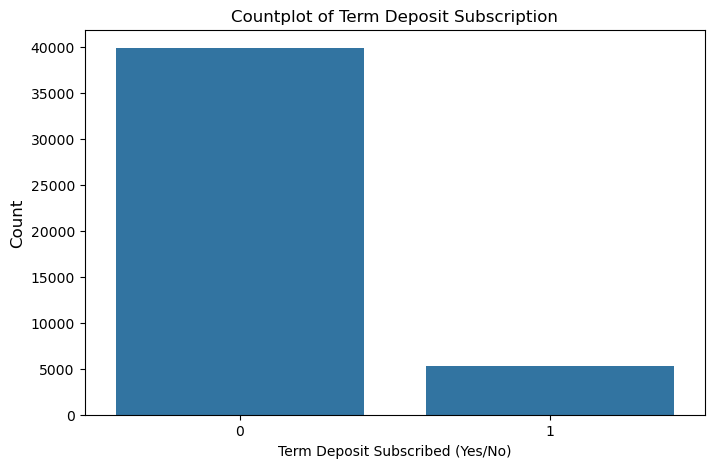

In [322]:
# Plot a countplot for the 'term deposit subscription' column
plt.figure(figsize=(8, 5))
sns.countplot(data=bank_df, x='term_deposit_subscription')
# Add title and labels
plt.title('Countplot of Term Deposit Subscription')
plt.xlabel('Term Deposit Subscribed (Yes/No)')
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show()

## Imbalance data

Imbalanced data occurs when one class in your dataset significantly outnumbers the other. This can pose challenges for machine learning models, as they might be biased towards the majority class.

In [324]:
bank_df['term_deposit_subscription'].value_counts()

term_deposit_subscription
0    39922
1     5289
Name: count, dtype: int64

Term Deposit Subscription

Not Subscribed :39922

Subscribed :5289

**Term_deposit_subscription is imbalanced**. So , doing Oversampling: Increasing the number of instances in the minority class.

### Addressing Imbalanced Data

If your data is imbalanced, you can consider techniques like:

Oversampling: Increasing the number of instances in the minority class.

Undersampling: Reducing the number of instances in the majority class.

Class weighting: Adjusting the weights of different classes during model training.

Ensemble methods: Combining multiple models to improve performance.


<h2 style="color: Red; font-family: Arial; font-weight: bold;text-align:left">Oversampling</h2>

In [328]:
pip install imblearn

In [441]:
from imblearn.over_sampling import RandomOverSampler


# Separate features and target variable
X = bank_df.drop('term_deposit_subscription', axis=1)
y = bank_df['term_deposit_subscription']

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
y_resampled = y_resampled.astype('int64')

# Create a new DataFrame with the resampled data
bank_df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

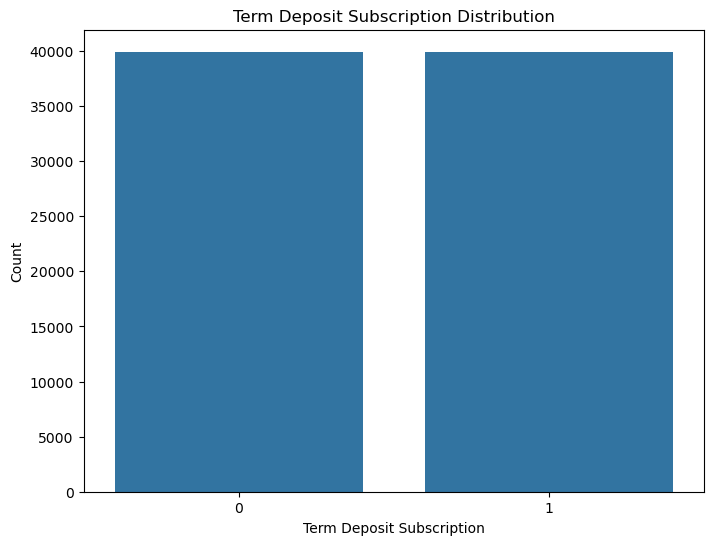

In [330]:
plt.figure(figsize=(8, 6))
sns.countplot(x="term_deposit_subscription",data=bank_df_resampled)
plt.title('Term Deposit Subscription Distribution')
plt.xlabel('Term Deposit Subscription')
plt.ylabel('Count')
plt.show()

In [443]:
bank_df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79844 entries, 0 to 79843
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   customer_age                  79844 non-null  int64 
 1   job_type                      79844 non-null  object
 2   marital_status                79844 non-null  object
 3   education_level               79844 non-null  object
 4   has_default_credit            79844 non-null  object
 5   account_balance               79844 non-null  int64 
 6   has_housing_loan              79844 non-null  object
 7   has_personal_loan             79844 non-null  object
 8   contact_type                  79844 non-null  object
 9   last_contact_day              79844 non-null  int64 
 10  last_contact_month            79844 non-null  object
 11  contact_duration              79844 non-null  int64 
 12  num_contacts_during_campaign  79844 non-null  int64 
 13  days_since_prev_

In [332]:
bank_df_resampled.shape

(79844, 17)

In [333]:
bank_df_resampled['term_deposit_subscription'].value_counts()

term_deposit_subscription
0    39922
1    39922
Name: count, dtype: int64

# <font color="#686868" size="5"> 🔍 Data Exploration(EDA) </font>

Exploratory Data Analysis (EDA), is an essential step in the machine learning pipeline. It involves **examining** and **visualizing the characteristics of a dataset to gain insights**, **understand patterns**, **detect anomalies**, and **prepare the data for further analysis** and **modeling**. some common techniques used in data exploration:
- Data Visualization
- Data Cleaning
- Data Preprocessing

# <font color="#4863A0" size="5"> Data Visualization

Creating visual representations such as **histograms**,**scatter plots**, **box plots**, and **heatmaps** to explore the distribution, relationships, and trends within the dataset. Visualization aids in identifying **patterns**, **correlations**, and **potential insights** that may not be apparent from just looking at the raw data. there are some ways to discover it:
- Graphical Analysis
    - Bar Charts
    - Pie Charts 
    - Histograms
- Correlation Analysis
- Data Relationships Analysis

In [336]:
#Creating function for numerical analysis
def plot_hist(column):
  plt.figure(figsize=(7,4))
  sns.histplot(data=bank_df_resampled,x=column,kde=True)
  plt.show()

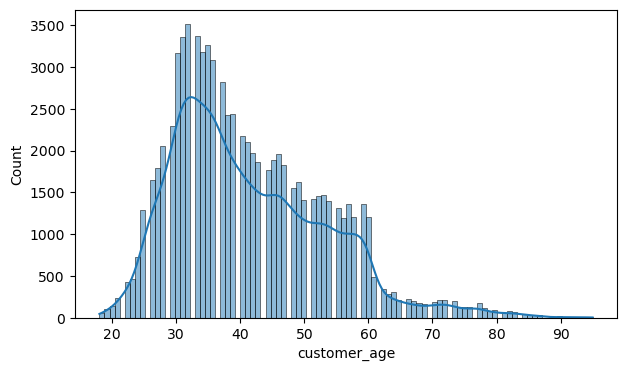

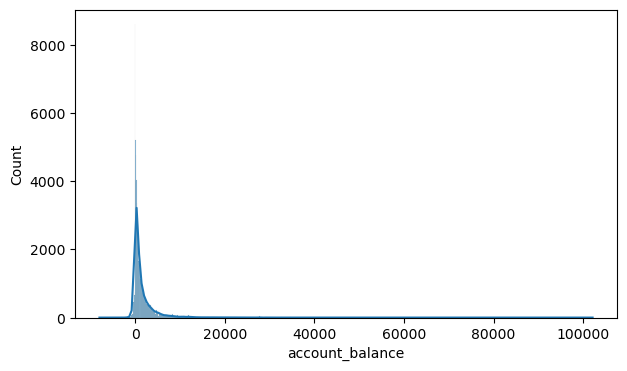

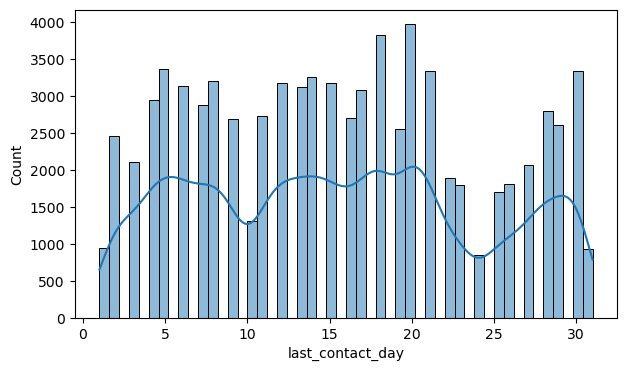

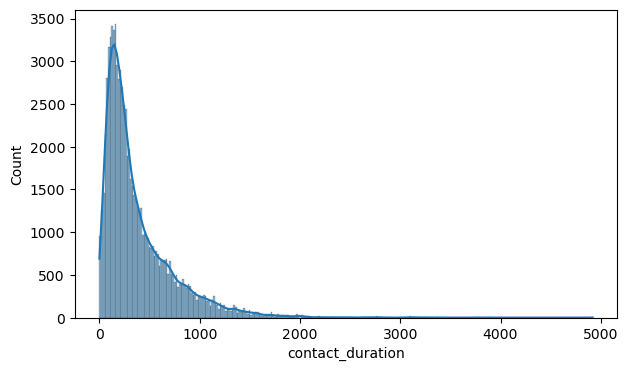

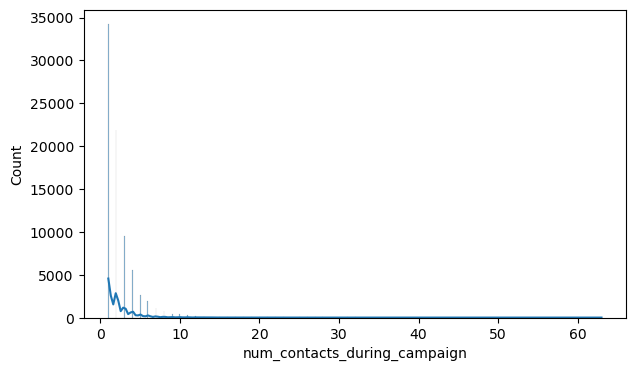

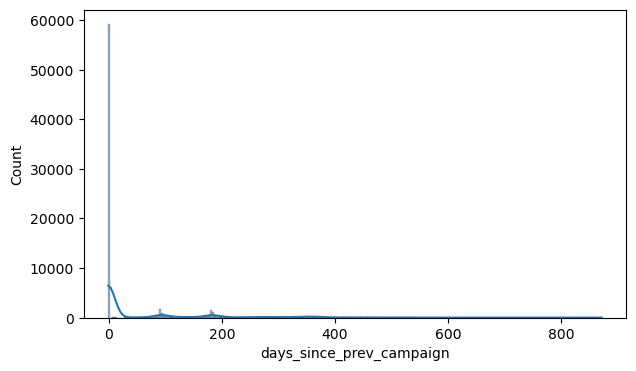

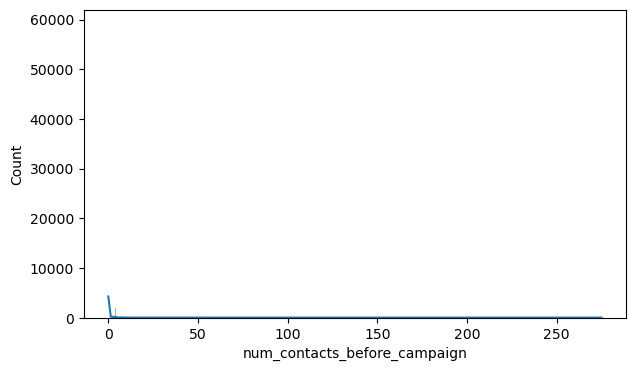

In [337]:
#plotting histogram for each numerical columns
numeric_columns = bank_df_resampled.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
    plot_hist(col)


**Take-away:**
there are 7 numerical features.

In [339]:
#categorical features
categorical_features = bank_df_resampled.select_dtypes(include='object').columns
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(bank_df_resampled[feature].unique())))

The feature is job_type and number of categories are 12
The feature is marital_status and number of categories are 3
The feature is education_level and number of categories are 4
The feature is has_default_credit and number of categories are 2
The feature is has_housing_loan and number of categories are 2
The feature is has_personal_loan and number of categories are 2
The feature is contact_type and number of categories are 3
The feature is last_contact_month and number of categories are 12
The feature is prev_campaign_outcome and number of categories are 4


**Take-away:**


There are 9 categorical features
feasure job and month has highest number of categorical valess.

### Categorical Feature Distribution ###

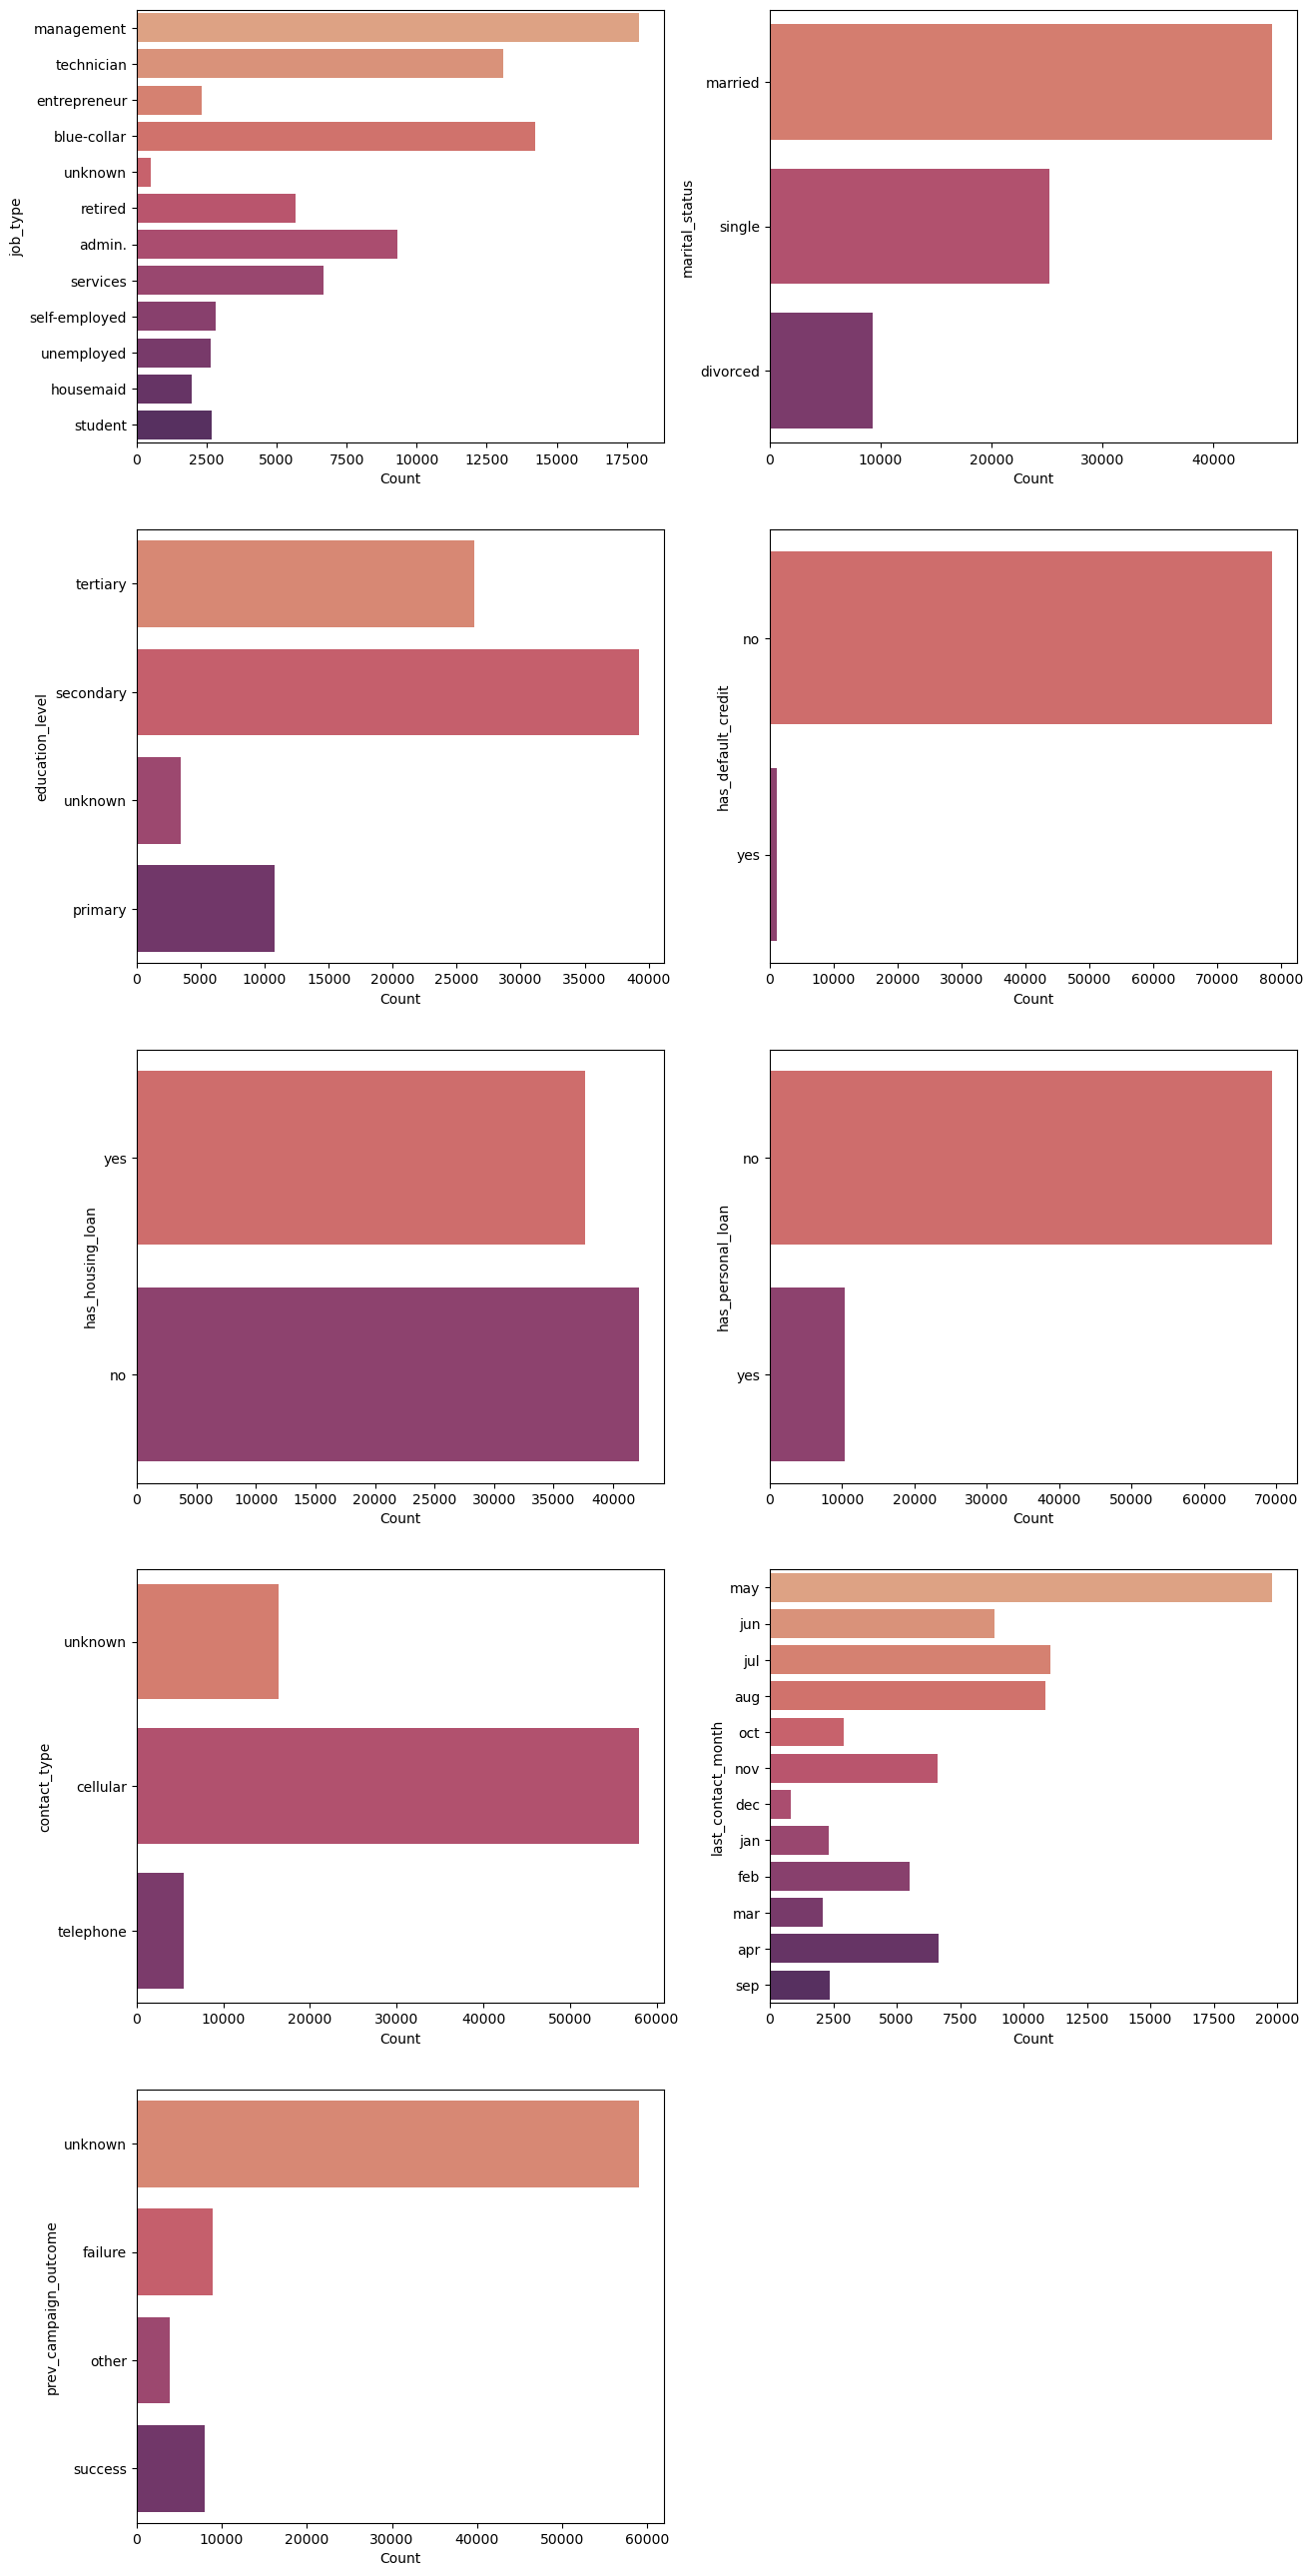

In [342]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,2,plotnumber)
    sns.countplot(y=categorical_feature,data=bank_df_resampled,palette="flare")
    plt.xlabel('Count')
    plt.ylabel(categorical_feature)
    plotnumber+=1
plt.show()

**Take-away:**

- client with **job type** as management records are high in given dataset and housemaid are very less
- client who **married** are high in records in given dataset and divorced are less
- client whoes **education background** is secondary are in high numbers in given dataset
- **has_default_credit** feature has value of no at high ratio to value yes

In [344]:
#Check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(bank_df_resampled.groupby(['term_deposit_subscription',categorical_feature]).size())

term_deposit_subscription  job_type     
0                          admin.           4540
                           blue-collar      9024
                           entrepreneur     1364
                           housemaid        1131
                           management       8157
                           retired          1748
                           self-employed    1392
                           services         3785
                           student           669
                           technician       6757
                           unemployed       1101
                           unknown           254
1                          admin.           4755
                           blue-collar      5208
                           entrepreneur      965
                           housemaid         816
                           management       9789
                           retired          3927
                           self-employed    1420
                           s

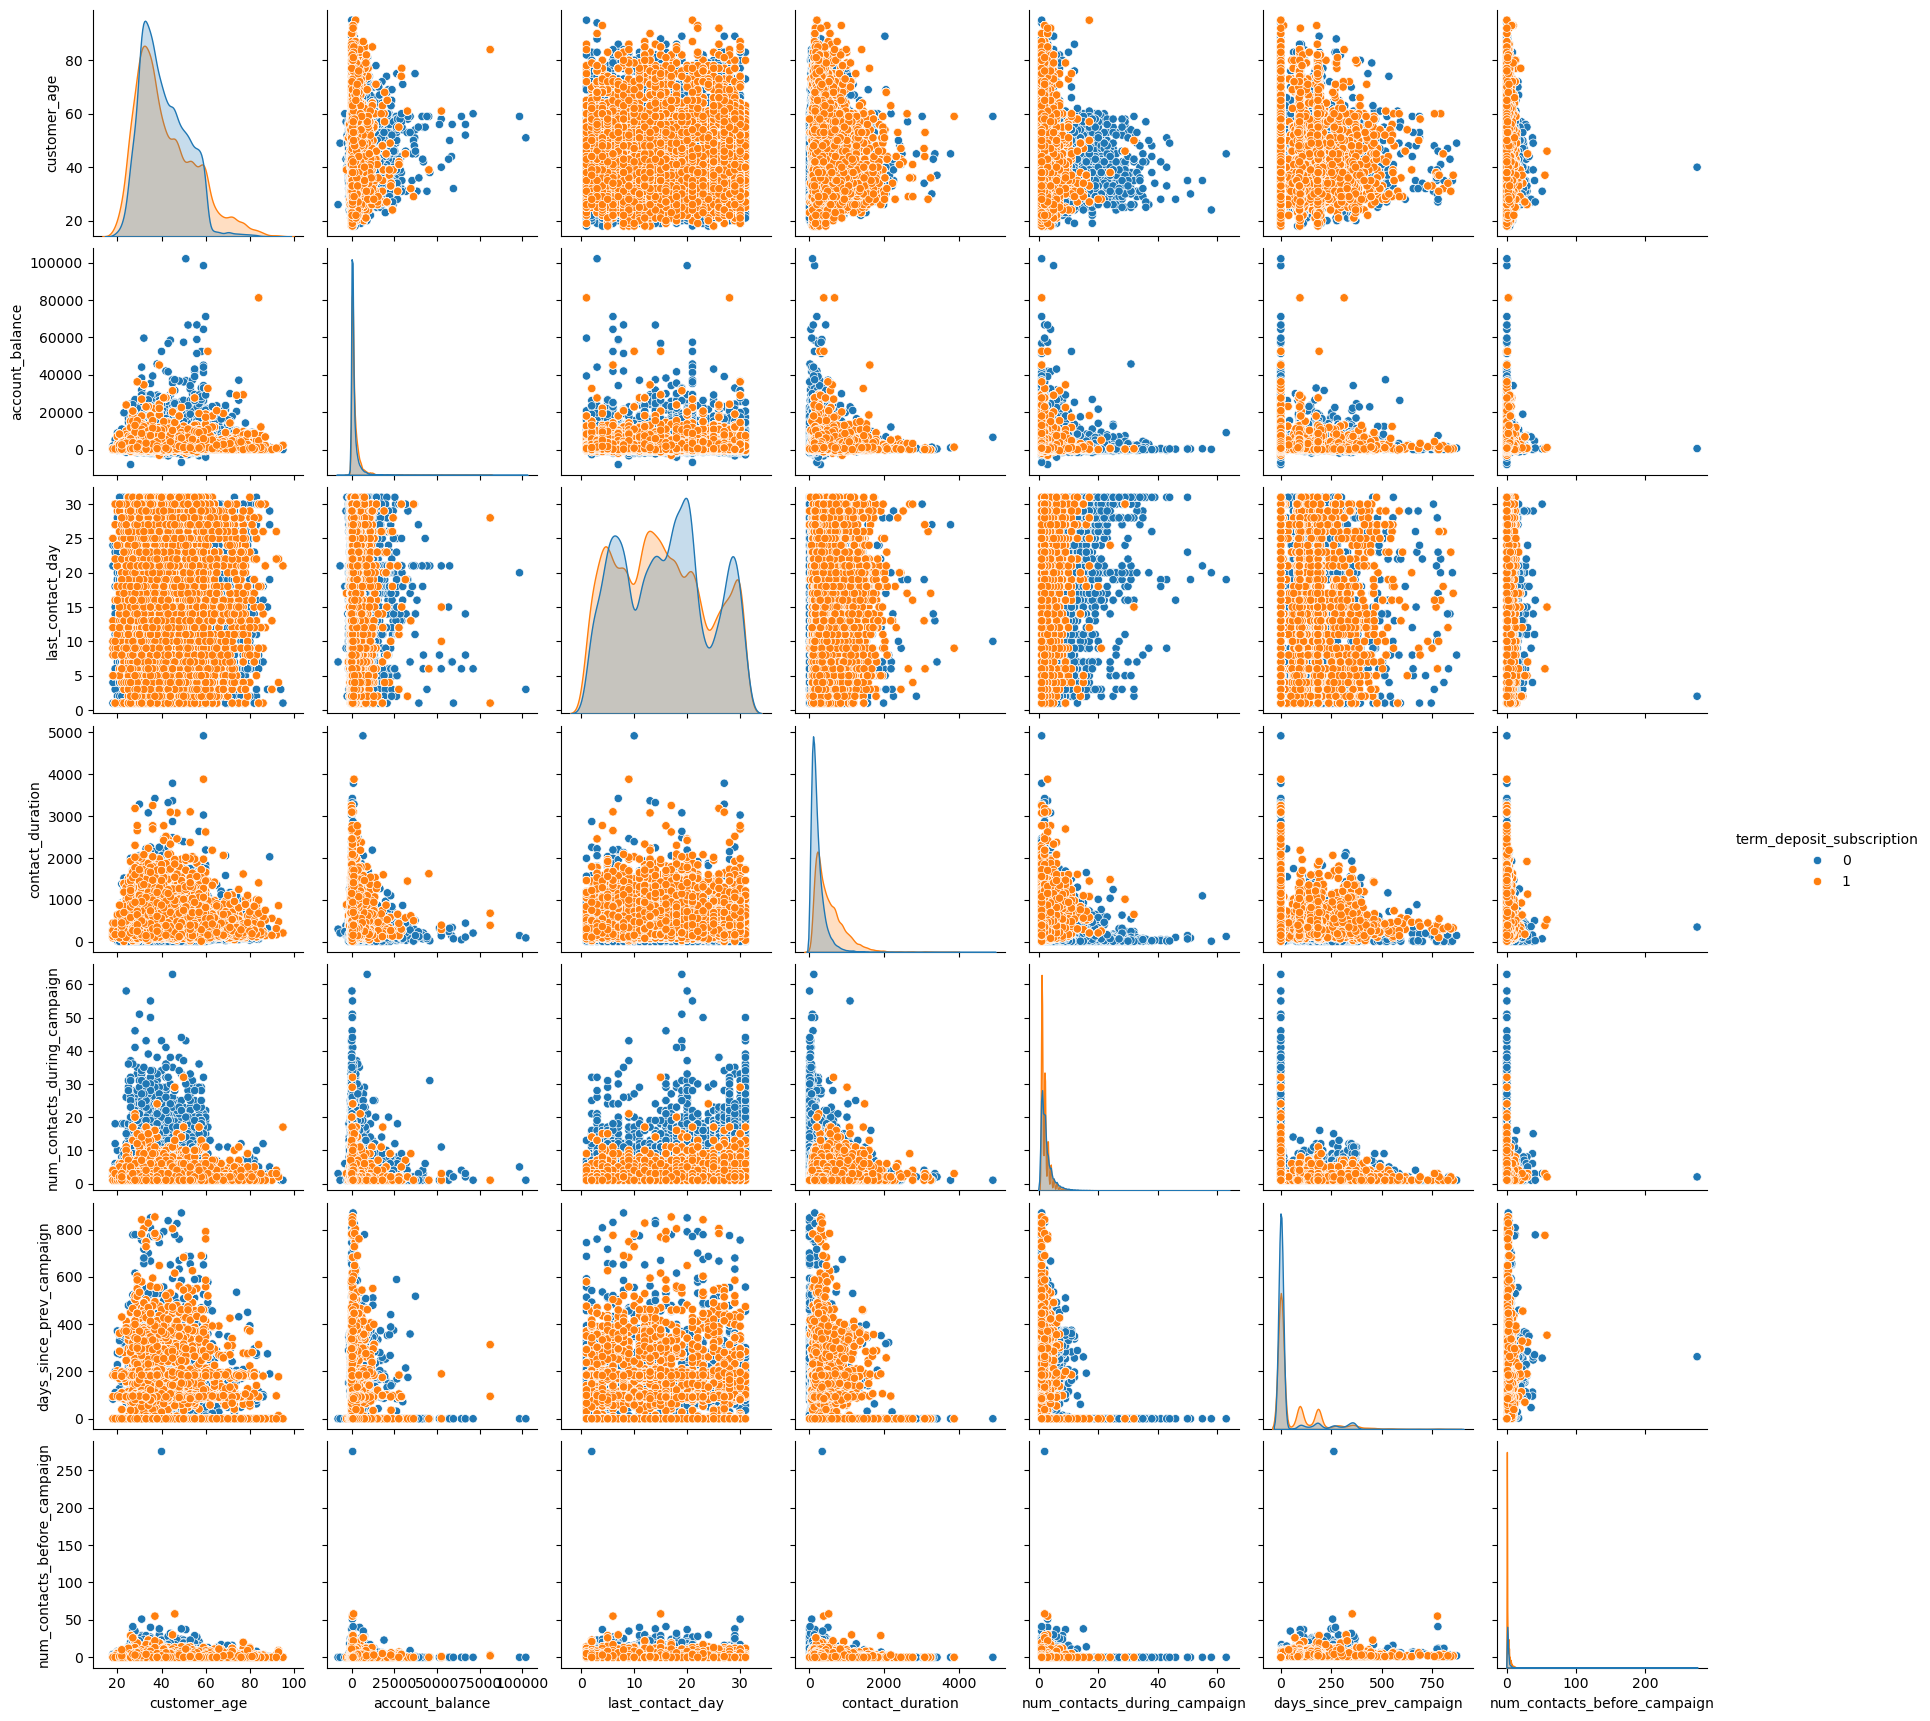

In [345]:
# Pairplot for numerical columns
#numerical_columns = ['customer_age', 'account_balance', 'contact_duration', 
#                     'num_contacts_during_campaign', 'days_since_prev_campaign', 'num_contacts_before_campaign']
numeric_columns = bank_df_resampled.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(bank_df_resampled, vars=numeric_columns, hue='term_deposit_subscription')
plt.show()

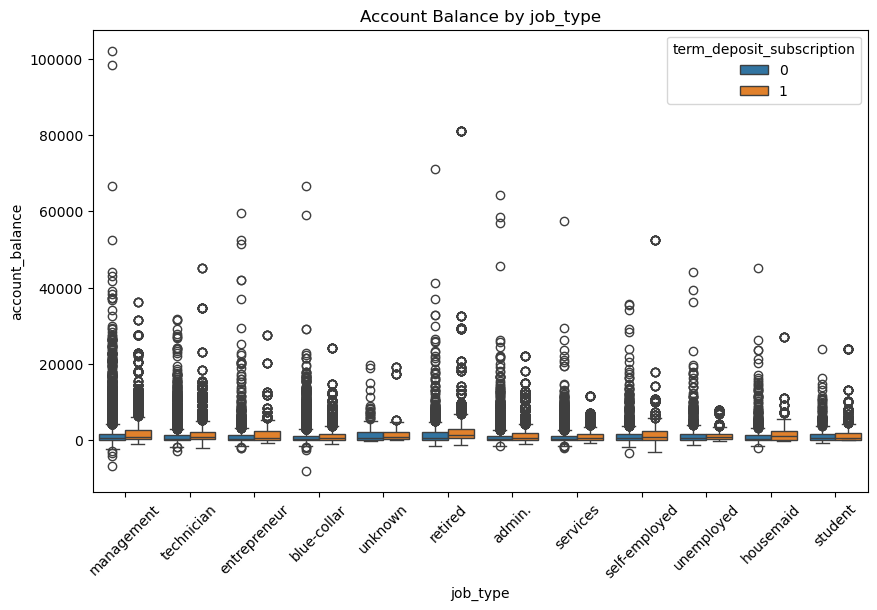

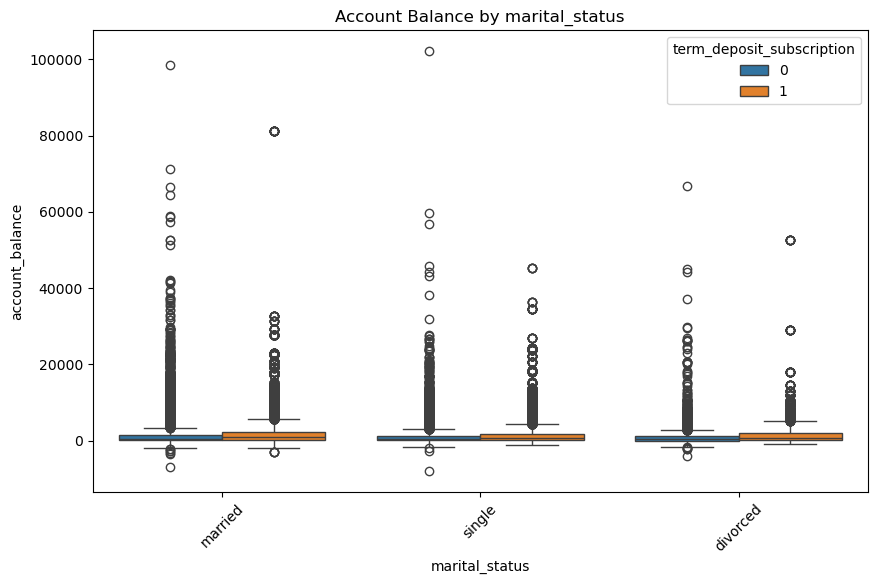

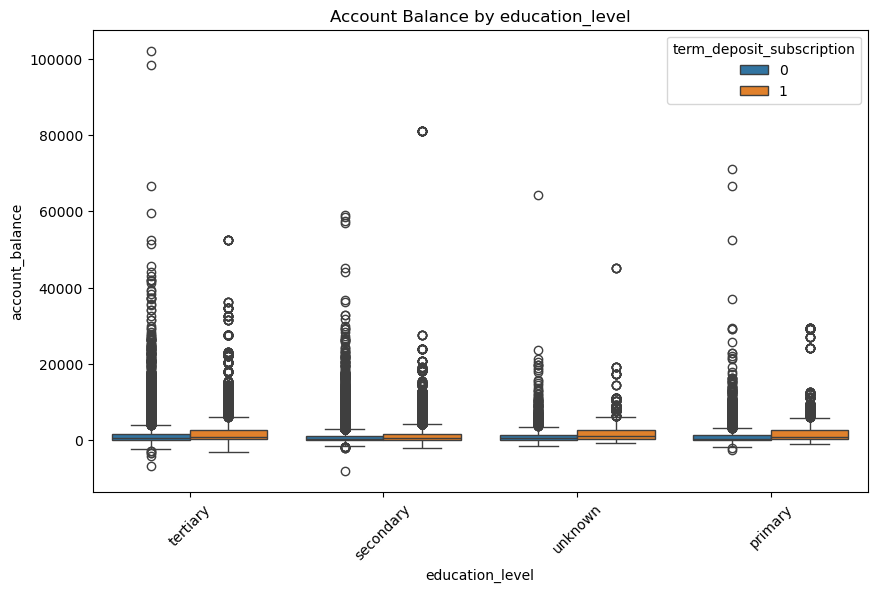

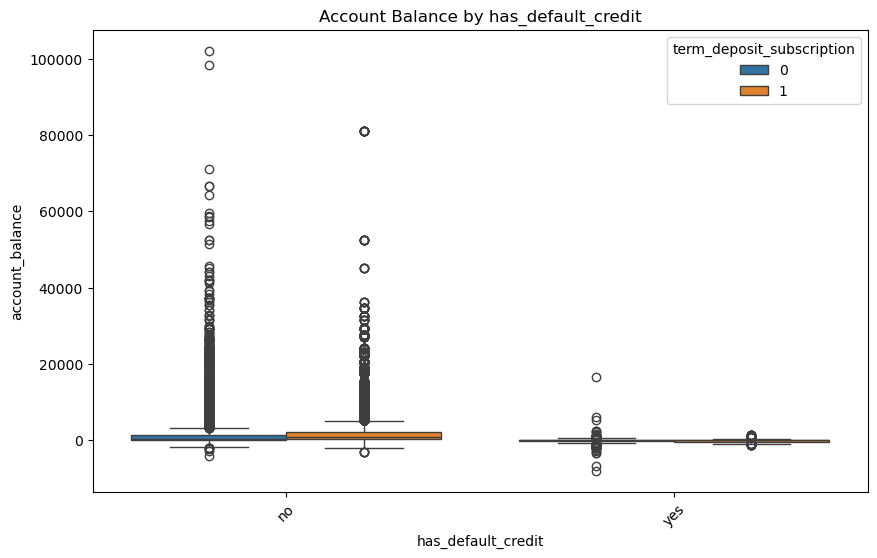

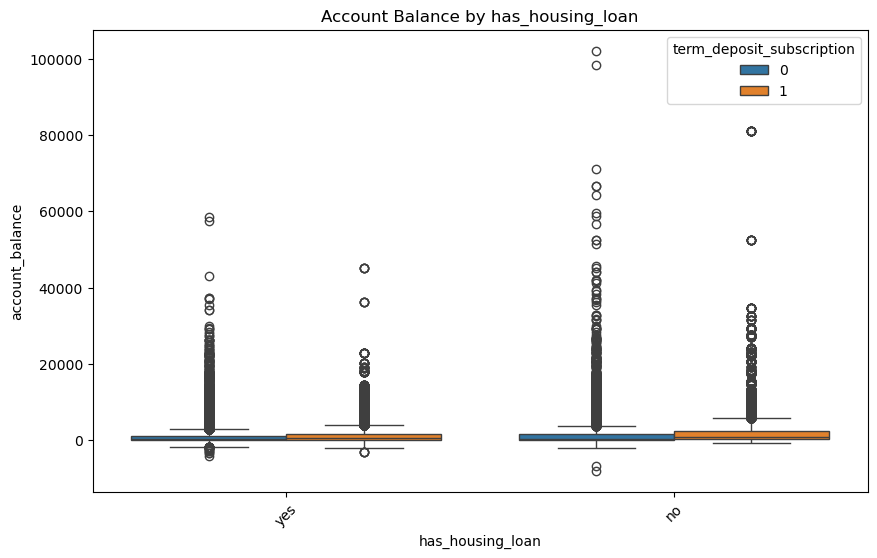

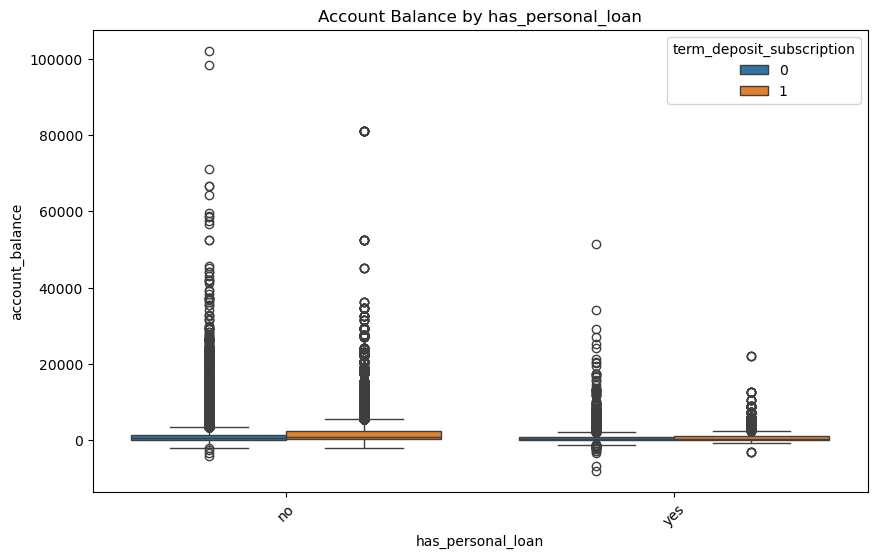

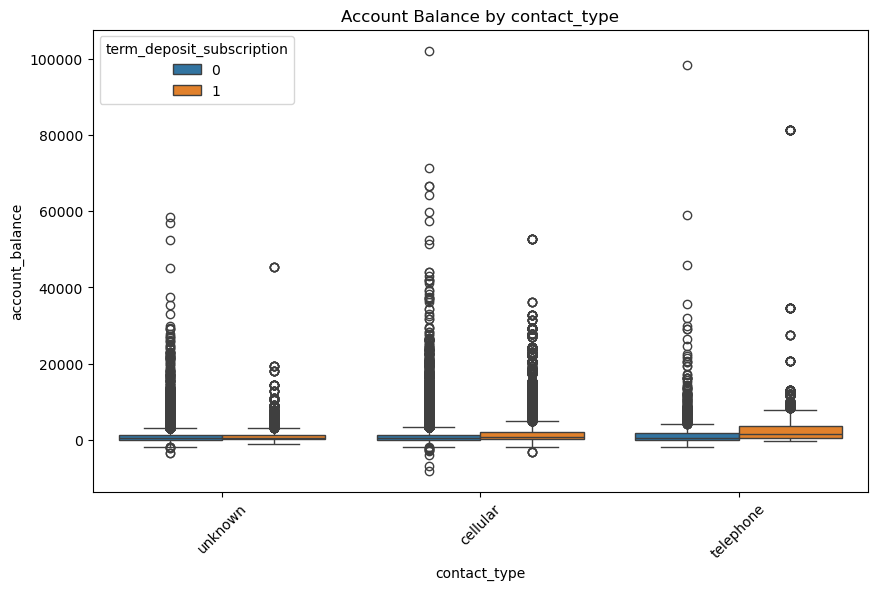

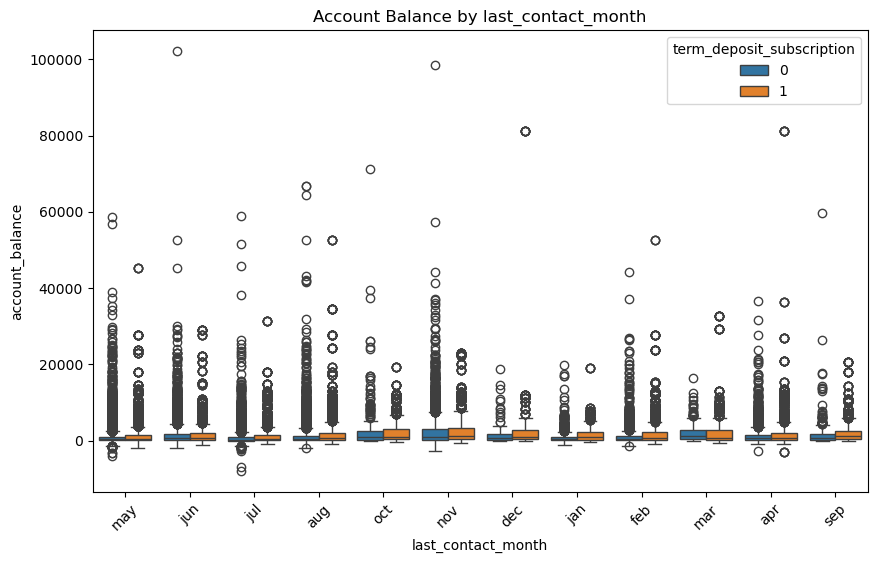

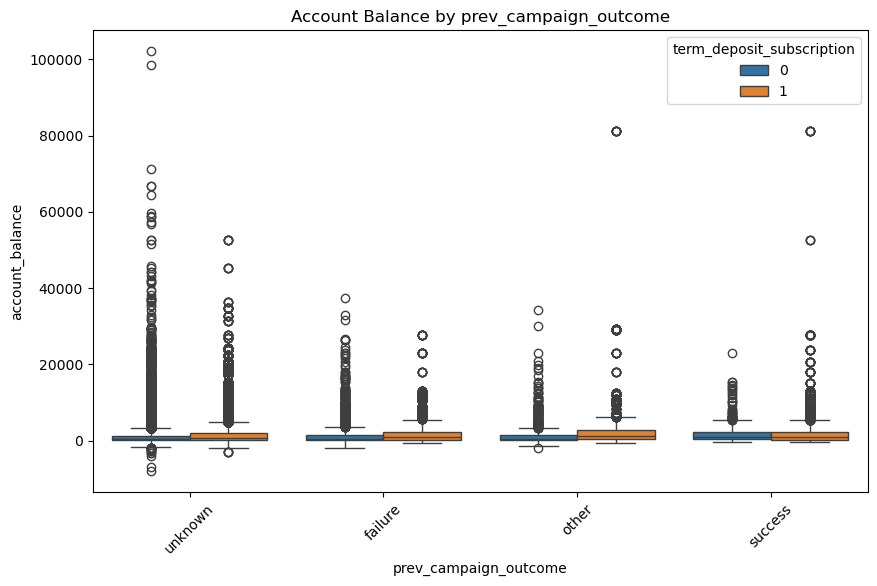

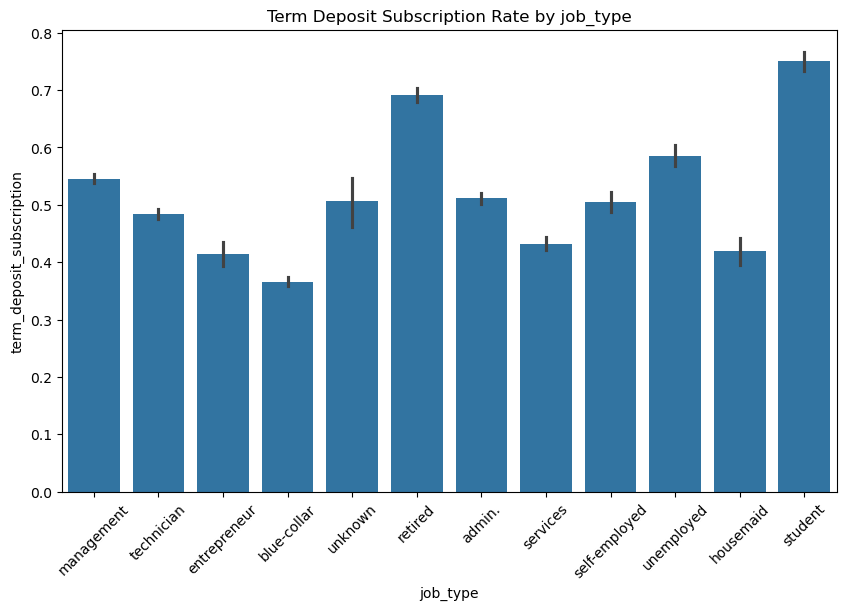

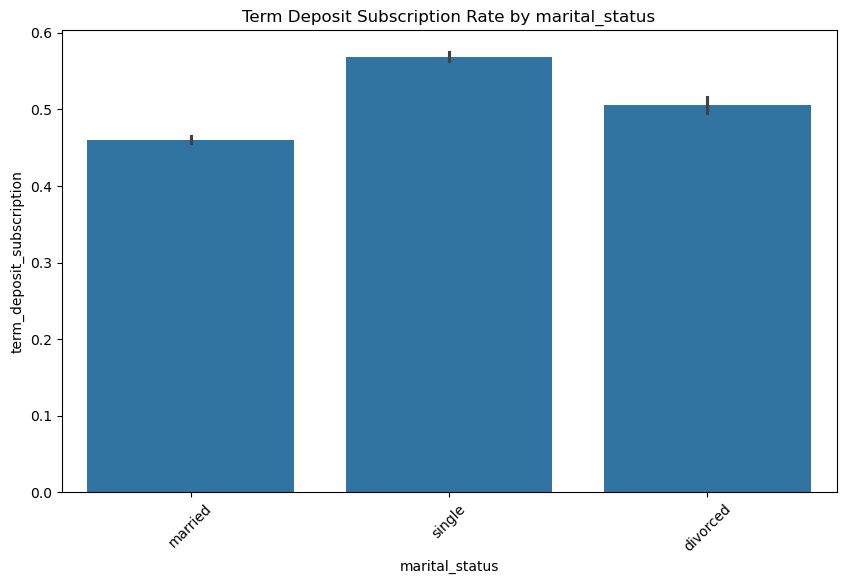

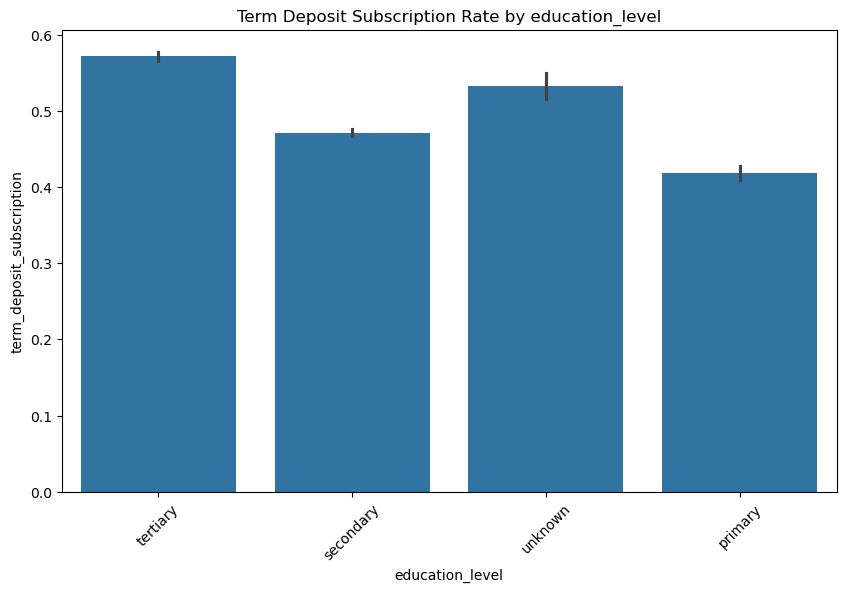

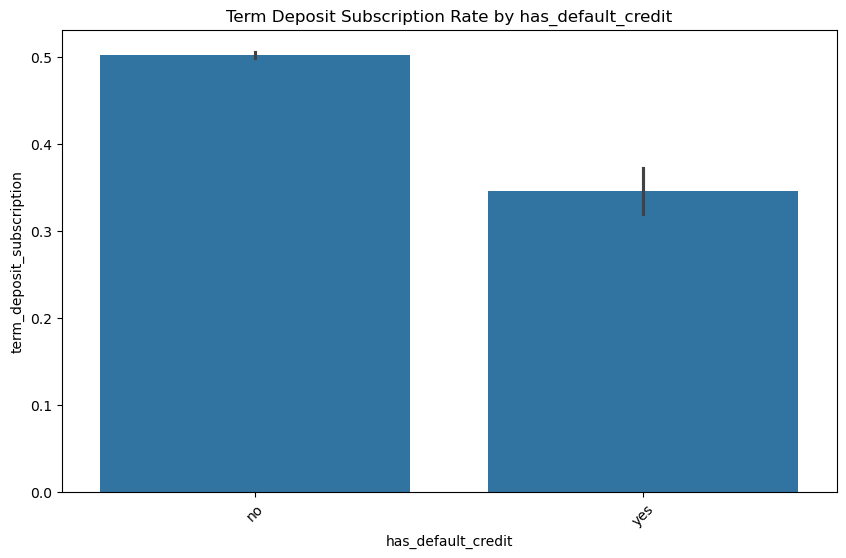

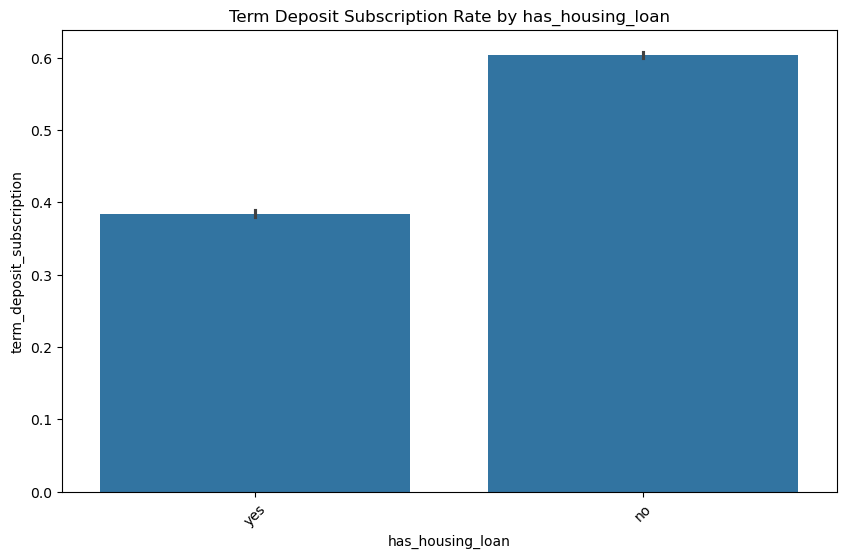

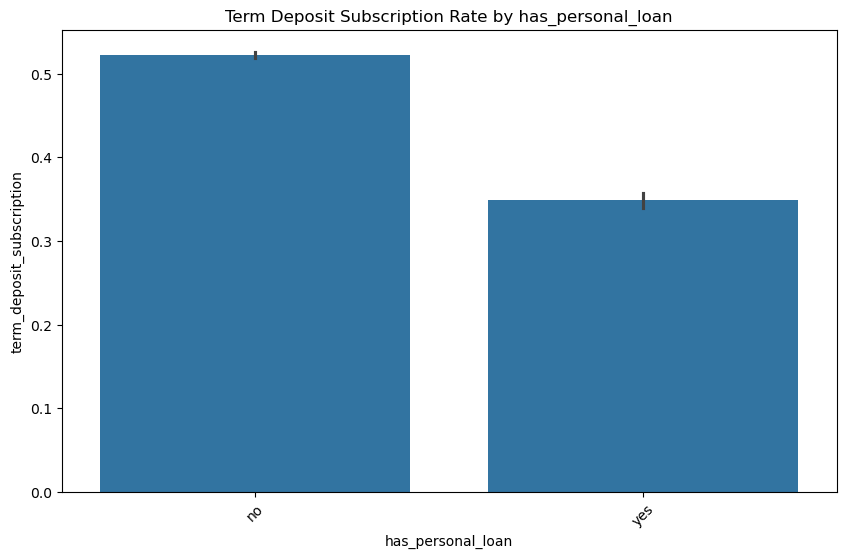

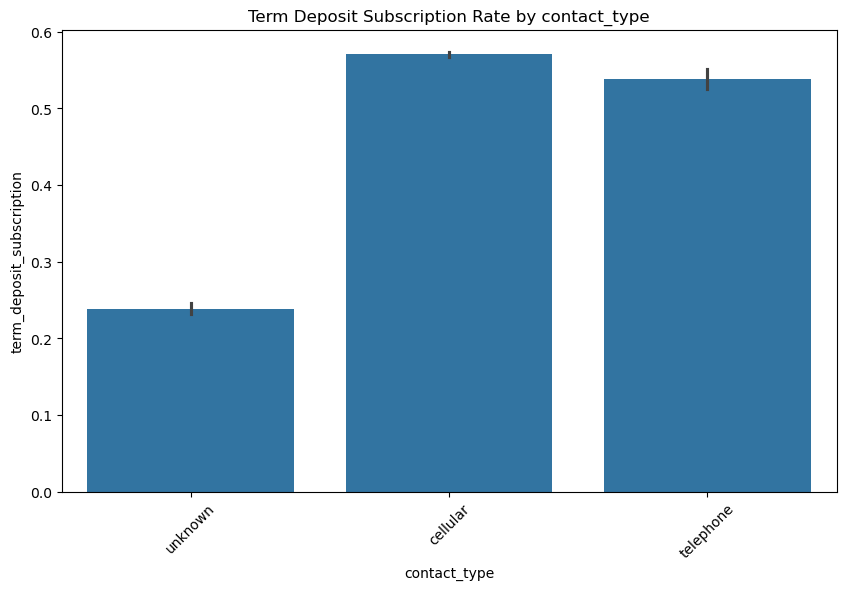

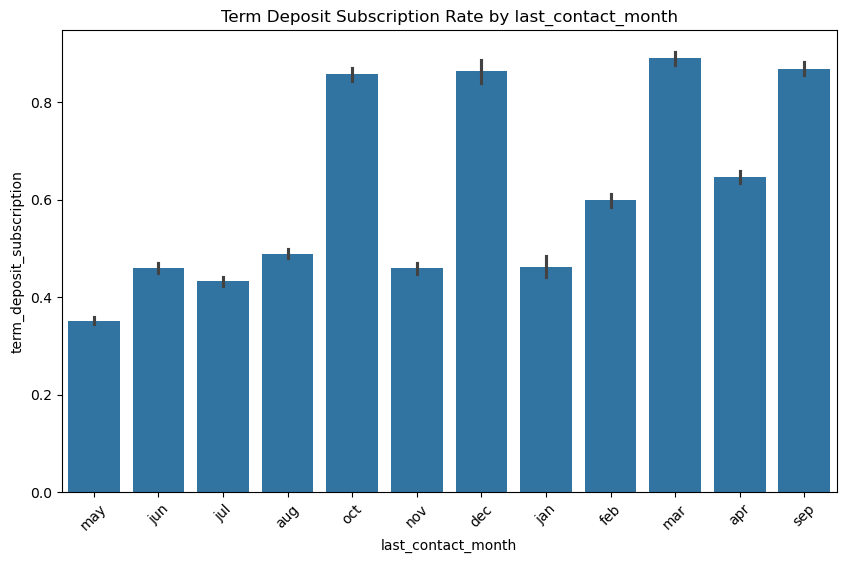

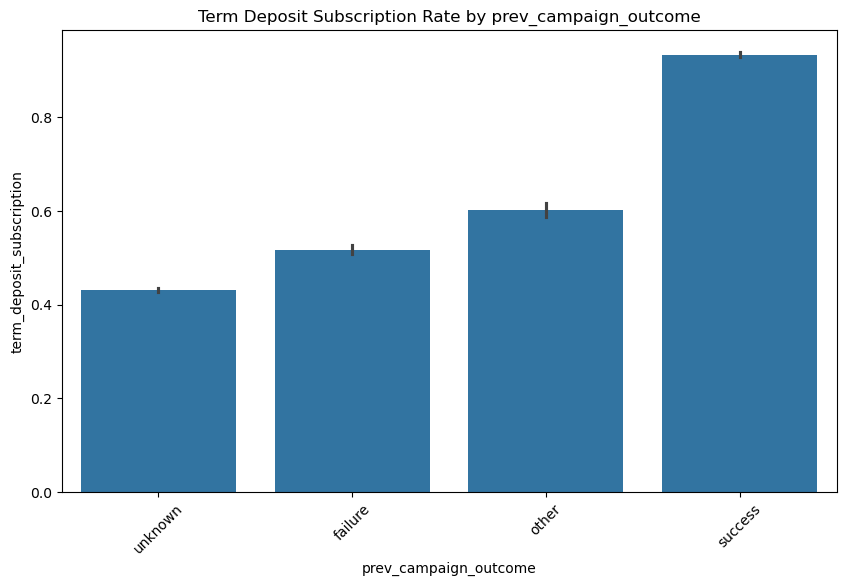

In [346]:
# Categorical columns
categorical_columns = bank_df_resampled.select_dtypes(include='object').columns
#categorical_columns = ['job_type', 'marital_status', 'education_level', 'has_default_credit', 
#                       'has_housing_loan', 'has_personal_loan', 'contact_type', 'prev_campaign_outcome']

# Box plot for categorical vs numerical
for cat_col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=bank_df_resampled, x=cat_col, y='account_balance', hue='term_deposit_subscription')
    plt.title(f'Account Balance by {cat_col}')
    plt.xticks(rotation=45)
    plt.show()

# Bar plot for categorical feature and target
for cat_col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=bank_df_resampled, x=cat_col, y='term_deposit_subscription')
    plt.title(f'Term Deposit Subscription Rate by {cat_col}')
    plt.xticks(rotation=45)
    plt.show()


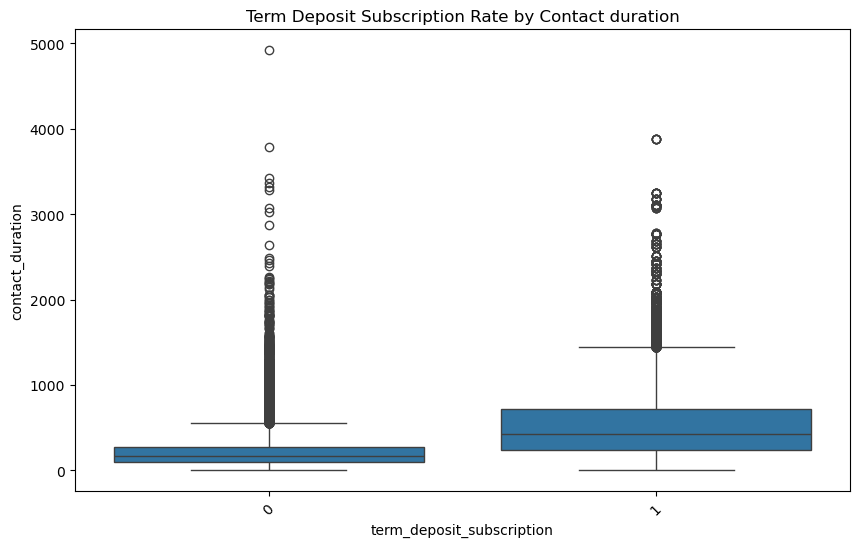

In [347]:
# Bar plot for contact_duration and target
plt.figure(figsize=(10, 6))
sns.boxplot(data=bank_df_resampled, x='term_deposit_subscription', y='contact_duration')
plt.title(f'Term Deposit Subscription Rate by Contact duration')
plt.xticks(rotation=45)
plt.show()


Take-away:

client shows interest on deposit who had discussion for longer duration

### Relationship between Categorical Features and Label

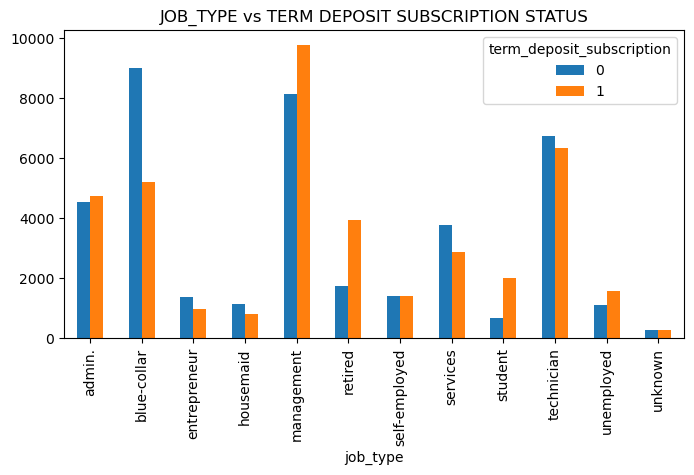

In [373]:

pd.crosstab(bank_df_resampled.job_type,bank_df_resampled.term_deposit_subscription).plot(kind='bar',figsize=(8,4))

plt.title('JOB_TYPE vs TERM DEPOSIT SUBSCRIPTION STATUS')
plt.show()

Around 20% of managers were subscribed term deposit.

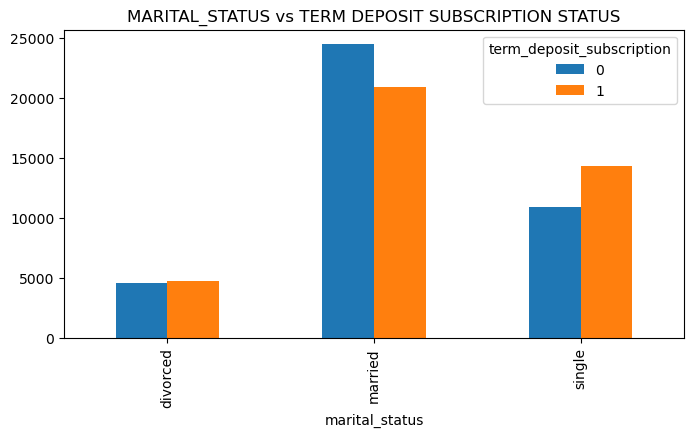

In [375]:

pd.crosstab(bank_df_resampled.marital_status,bank_df_resampled.term_deposit_subscription).plot(kind='bar',figsize=(8,4))

plt.title('MARITAL_STATUS vs TERM DEPOSIT SUBSCRIPTION STATUS')
plt.show()

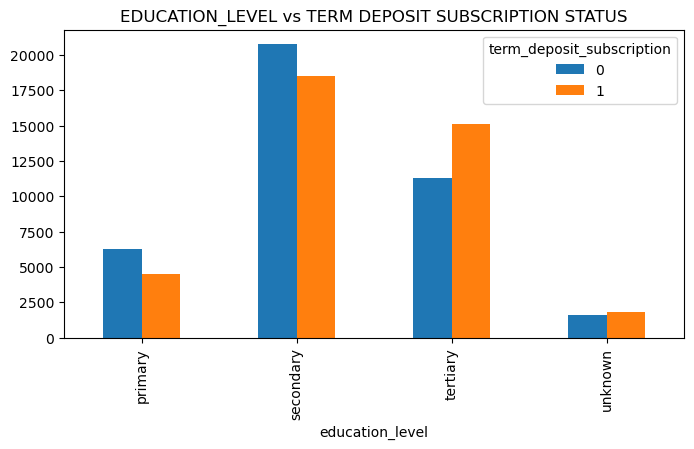

In [377]:

pd.crosstab(bank_df_resampled.education_level,bank_df_resampled.term_deposit_subscription).plot(kind='bar',figsize=(8,4))

plt.title('EDUCATION_LEVEL vs TERM DEPOSIT SUBSCRIPTION STATUS')
plt.show()

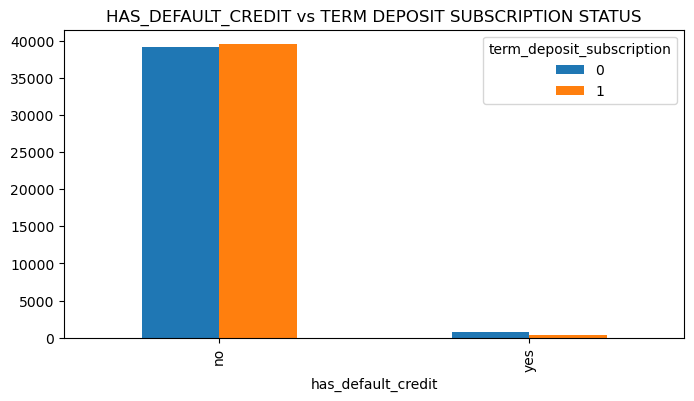

In [379]:

pd.crosstab(bank_df_resampled.has_default_credit,bank_df_resampled.term_deposit_subscription).plot(kind='bar',figsize=(8,4))

plt.title('HAS_DEFAULT_CREDIT vs TERM DEPOSIT SUBSCRIPTION STATUS')
plt.show()

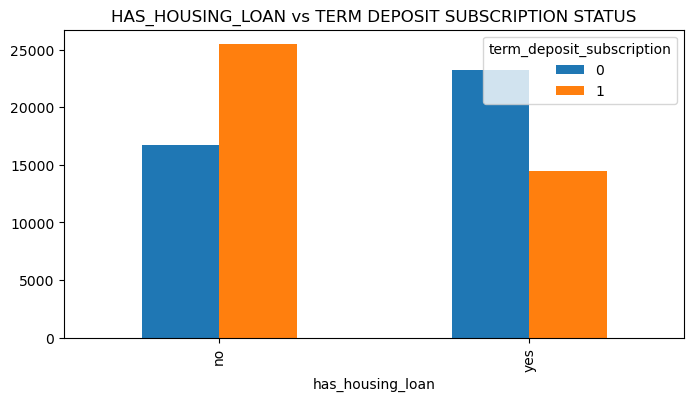

In [381]:

pd.crosstab(bank_df_resampled.has_housing_loan,bank_df_resampled.term_deposit_subscription).plot(kind='bar',figsize=(8,4))

plt.title('HAS_HOUSING_LOAN vs TERM DEPOSIT SUBSCRIPTION STATUS')
plt.show()

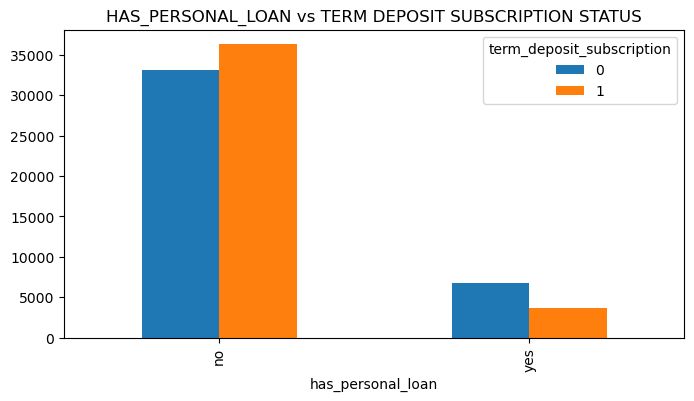

In [383]:

pd.crosstab(bank_df_resampled.has_personal_loan,bank_df_resampled.term_deposit_subscription).plot(kind='bar',figsize=(8,4))

plt.title('HAS_PERSONAL_LOAN vs TERM DEPOSIT SUBSCRIPTION STATUS')
plt.show()

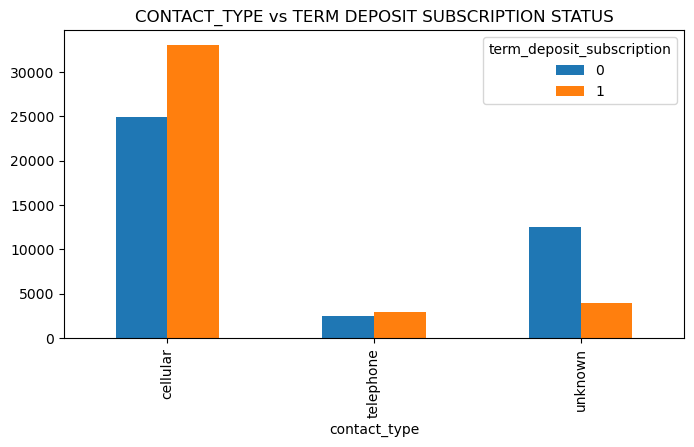

In [385]:

pd.crosstab(bank_df_resampled.contact_type,bank_df_resampled.term_deposit_subscription).plot(kind='bar',figsize=(8,4))

plt.title('CONTACT_TYPE vs TERM DEPOSIT SUBSCRIPTION STATUS')
plt.show()

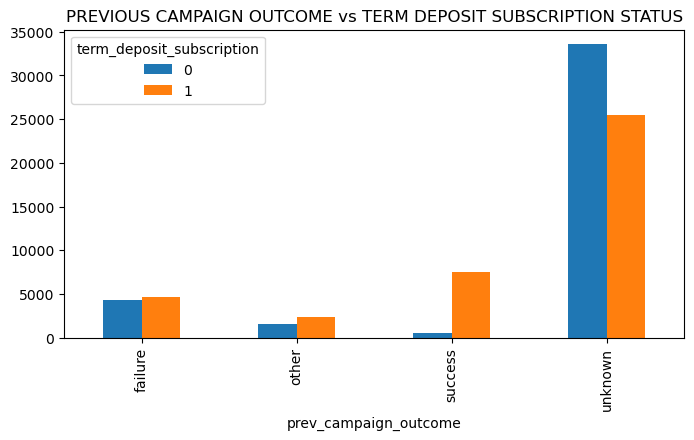

In [387]:
pd.crosstab(bank_df_resampled.prev_campaign_outcome,bank_df_resampled.term_deposit_subscription).plot(kind='bar',figsize=(8,4))

plt.title('PREVIOUS CAMPAIGN OUTCOME vs TERM DEPOSIT SUBSCRIPTION STATUS')
plt.show()

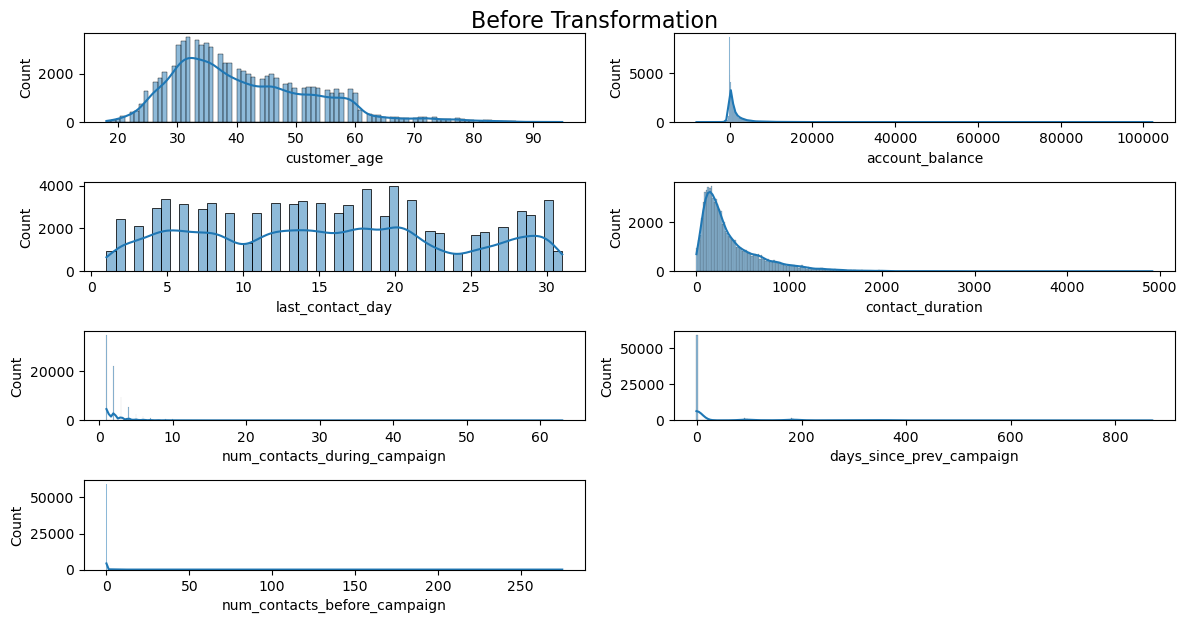

In [389]:
numeric_columns = bank_df_resampled.select_dtypes(include=['int64', 'float64']).columns
# check distribution and outliers
plt.figure(figsize=(12,15))
plt.suptitle("Before Transformation", fontsize = 16)
index = 1
for col in numeric_columns:
    plt.subplot(10,2,index)
    sns.histplot(data=bank_df_resampled,x=col,kde=True)
    index+=1
plt.tight_layout()
plt.show()


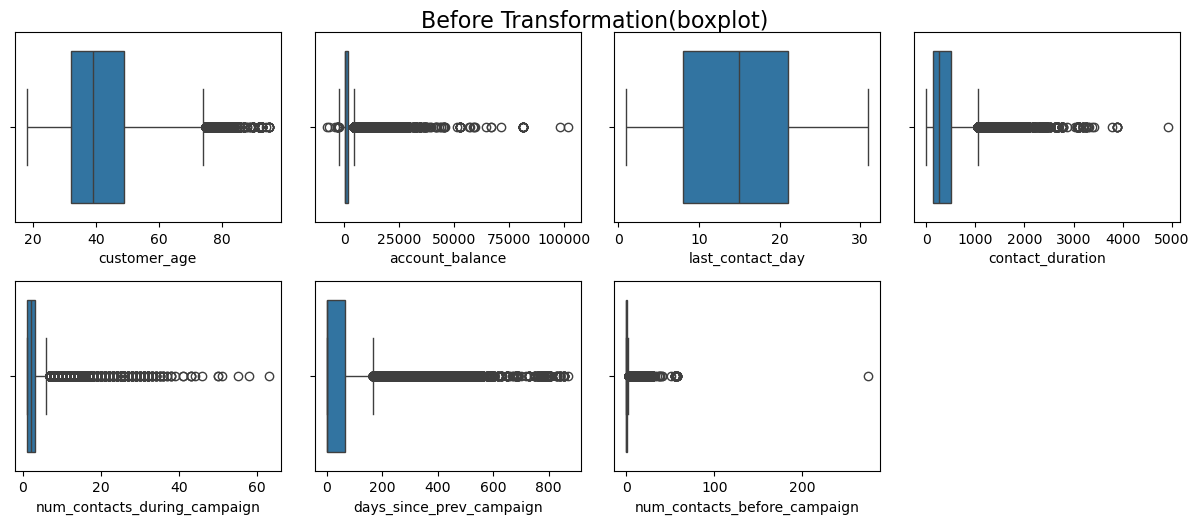

In [391]:
numeric_columns = bank_df_resampled.select_dtypes(include=['int64', 'float64']).columns
# check distribution and outliers
plt.figure(figsize=(12,15))
plt.suptitle("Before Transformation(boxplot)", fontsize = 16)
index = 1
for col in numeric_columns:
    plt.subplot(6,4,index)
    sns.boxplot(x=bank_df_resampled[col])
    index+=1
plt.tight_layout()
plt.show()


In [393]:
#Checking Skewness
skewness = bank_df_resampled[numeric_columns].skew()
print("Skewness:\n", skewness)

Skewness:
 customer_age                     0.831272
account_balance                  8.022053
last_contact_day                 0.126157
contact_duration                 2.121283
num_contacts_during_campaign     5.201246
days_since_prev_campaign         2.373541
num_contacts_before_campaign    23.104818
dtype: float64


In [395]:
bank_df_resampled

customer_age      job_type marital_status education_level  \
0                58    management        married        tertiary   
1                44    technician         single       secondary   
2                33  entrepreneur        married       secondary   
3                47   blue-collar        married         unknown   
4                33       unknown         single         unknown   
...             ...           ...            ...             ...   
79839            53        admin.        married       secondary   
79840            43    management        married        tertiary   
79841            38    management        married        tertiary   
79842            53   blue-collar         single       secondary   
79843            42    technician        married        tertiary   

      has_default_credit  account_balance has_housing_loan has_personal_loan  \
0                     no             2143              yes                no   
1                     no               29              yes                no   
2                     no                2              yes               yes   
3                     no             1506              yes                no   
4                     no                1               no                no   
...                  ...              ...              ...               ...   
79839                 no             1796               no                no   
79840                 no                0               no                no   
79841                 no              536              yes                no   
79842                 no             1004               no                no   
79843                 no              757               no                no   

      contact_type  last_contact_day last_contact_month  contact_duration  \
0          unknown                 5                may               261   
1          unknown                 5                may               151   
2          unknown                 5                may                76   
3          unknown                 5                may                92   
4          unknown                 5                may               198   
...            ...               ...                ...               ...   
79839    telephone                16                mar               295   
79840     cellular                14                jul              1153   
79841     cellular                22                jul               248   
79842     cellular                13                may               393   
79843     cellular                10                feb               154   

       num_contacts_during_campaign  days_since_prev_campaign  \
0                                 1                        -1   
1                                 1                        -1   
2                                 1                        -1   
3                                 1                        -1   
4                                 1                        -1   
...                             ...                       ...   
79839                             1                        91   
79840                             3                        -1   
79841                             1                        -1   
79842                             1                        84   
79843                             1                        -1   

       num_contacts_before_campaign prev_campaign_outcome  \
0                                 0               unknown   
1                                 0               unknown   
2                                 0               unknown   
3                                 0               unknown   
4                                 0               unknown   
...                             ...                   ...   
79839                             2               success   
79840                             0

**Skewness**
- customer_age                     0.831272    Slightly right-skewed.   Action: No action needed
- account_balance                  8.022053    Highly right-skewed. Action:Log transformation needed
- last_contact_day                 0.126157    Almost symmetric.   Action:No action needed
- contact_duration                 2.121283    Strongly right-skewed.  Action:Log or square root transformation needed
- num_contacts_during_campaign     5.201246    Highly right-skewed.  Action:Log transformation needed
- days_since_prev_campaign         2.373541    Strongly right-skewed.  Action:Log transformation needed
- num_contacts_before_campaign    23.104818    Extremely right-skewed.  Action:Log transformation or capping needed


In [445]:
#create a copy of the resampled dataset
bank_df_resampled_skew=bank_df_resampled.copy()

In [447]:
min_val = bank_df_resampled_skew['account_balance'].min()
if min_val <= 0:
    shift_value = abs(min_val) + 1  # Ensure all values become positive
    bank_df_resampled_skew['account_balance'] = bank_df_resampled_skew['account_balance'] + shift_value


In [449]:
min_val = bank_df_resampled_skew['days_since_prev_campaign'].min()
if min_val <= 0:
    shift_value = abs(min_val) + 1  # Ensure all values become positive
    bank_df_resampled_skew['days_since_prev_campaign'] = bank_df_resampled_skew['days_since_prev_campaign'] + shift_value


In [451]:

# transform skewed features
bank_df_resampled_skew['account_balance'] = np.log1p(bank_df_resampled_skew['account_balance'])
bank_df_resampled_skew['contact_duration'] = np.sqrt(bank_df_resampled_skew['contact_duration'])
bank_df_resampled_skew['num_contacts_during_campaign'] = np.log1p(bank_df_resampled_skew['num_contacts_during_campaign'])
bank_df_resampled_skew['days_since_prev_campaign'] = np.sqrt(bank_df_resampled_skew['days_since_prev_campaign'] )
bank_df_resampled_skew['num_contacts_before_campaign'] = np.log1p(bank_df_resampled_skew['num_contacts_before_campaign'])

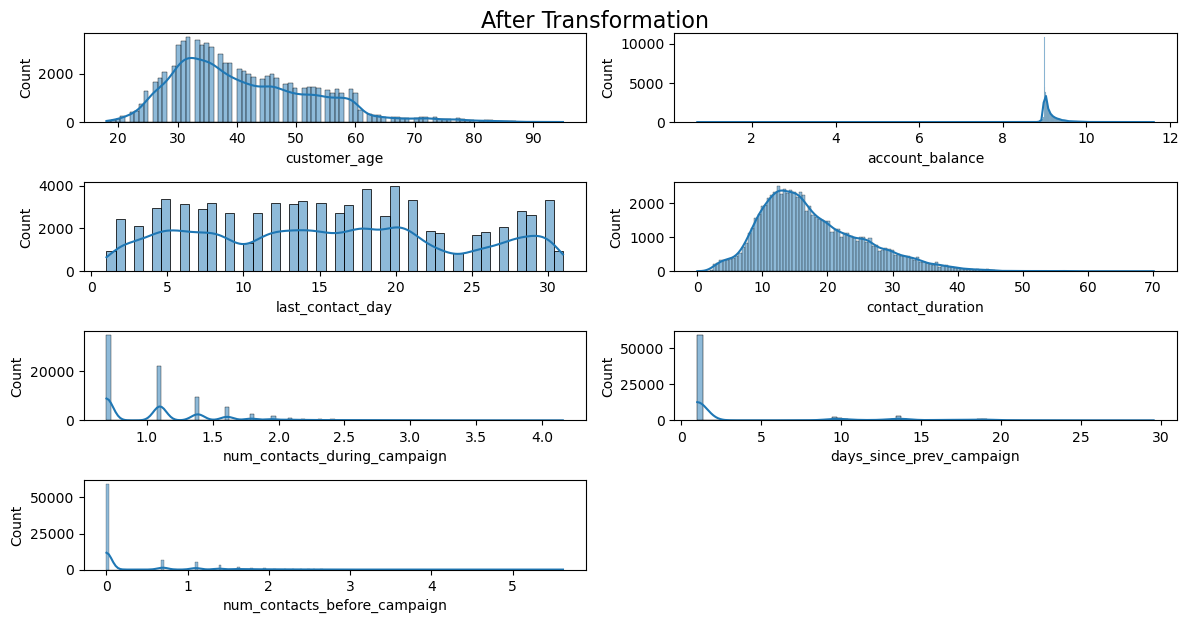

In [405]:
numeric_columns = bank_df_resampled_skew.select_dtypes(include=['int64', 'float64']).columns
# check distribution and outliers after skewness treatment
plt.figure(figsize=(12,15))
plt.suptitle("After Transformation", fontsize = 16)
index = 1
for col in numeric_columns:
    plt.subplot(10,2,index)
   # sns.boxplot(x=bank_df_resampled_skew[col])
    sns.histplot(data=bank_df_resampled_skew,x=col,kde=True)
    index+=1
plt.tight_layout()
plt.show()

In [453]:
#Checking Skewness
skewness = bank_df_resampled_skew[numeric_columns].skew()
print("Skewness:\n", skewness)

Skewness:
 customer_age                    0.831272
account_balance                 2.015187
last_contact_day                0.126157
contact_duration                0.846242
num_contacts_during_campaign    1.387098
days_since_prev_campaign        1.504549
num_contacts_before_campaign    1.861768
dtype: float64


In [455]:
bank_df_resampled_skew.isnull().sum()

customer_age                    0
job_type                        0
marital_status                  0
education_level                 0
has_default_credit              0
account_balance                 0
has_housing_loan                0
has_personal_loan               0
contact_type                    0
last_contact_day                0
last_contact_month              0
contact_duration                0
num_contacts_during_campaign    0
days_since_prev_campaign        0
num_contacts_before_campaign    0
prev_campaign_outcome           0
term_deposit_subscription       0
dtype: int64

In [457]:
bank_df_resampled_skew

customer_age      job_type marital_status education_level  \
0                58    management        married        tertiary   
1                44    technician         single       secondary   
2                33  entrepreneur        married       secondary   
3                47   blue-collar        married         unknown   
4                33       unknown         single         unknown   
...             ...           ...            ...             ...   
79839            53        admin.        married       secondary   
79840            43    management        married        tertiary   
79841            38    management        married        tertiary   
79842            53   blue-collar         single       secondary   
79843            42    technician        married        tertiary   

      has_default_credit  account_balance has_housing_loan has_personal_loan  \
0                     no         9.226607              yes                no   
1                     no         8.993427              yes                no   
2                     no         8.990068              yes               yes   
3                     no         9.161885              yes                no   
4                     no         8.989943               no                no   
...                  ...              ...              ...               ...   
79839                 no         9.191871               no                no   
79840                 no         8.989818               no                no   
79841                 no         9.054505              yes                no   
79842                 no         9.107754               no                no   
79843                 no         9.080004               no                no   

      contact_type  last_contact_day last_contact_month  contact_duration  \
0          unknown                 5                may         16.155494   
1          unknown                 5                may         12.288206   
2          unknown                 5                may          8.717798   
3          unknown                 5                may          9.591663   
4          unknown                 5                may         14.071247   
...            ...               ...                ...               ...   
79839    telephone                16                mar         17.175564   
79840     cellular                14                jul         33.955854   
79841     cellular                22                jul         15.748016   
79842     cellular                13                may         19.824228   
79843     cellular                10                feb         12.409674   

       num_contacts_during_campaign  days_since_prev_campaign  \
0                          0.693147                  1.000000   
1                          0.693147                  1.000000   
2                          0.693147                  1.000000   
3                          0.693147                  1.000000   
4                          0.693147                  1.000000   
...                             ...                       ...   
79839                      0.693147                  9.643651   
79840                      1.386294                  1.000000   
79841                      0.693147                  1.000000   
79842                      0.693147                  9.273618   
79843                      0.693147                  1.000000   

       num_contacts_before_campaign prev_campaign_outcome  \
0                          0.000000               unknown   
1                          0.000000               unknown   
2                          0.000000               unknown   
3                          0.000000               unknown   
4                          0.000000               unknown   
...                             ...                   ...   
79839                      1.098612               success   
79840                      0.000000

In [459]:
#Checking kurtosis
kurtosis = bank_df_resampled_skew[numeric_columns].kurtosis()
print("kurtosis:\n", kurtosis)#Checking kurtosis


kurtosis:
 customer_age                     0.533221
account_balance                 38.667931
last_contact_day                -1.059731
contact_duration                 0.707557
num_contacts_during_campaign     2.315801
days_since_prev_campaign         0.871330
num_contacts_before_campaign     2.819164
dtype: float64


## Outlier Treatment

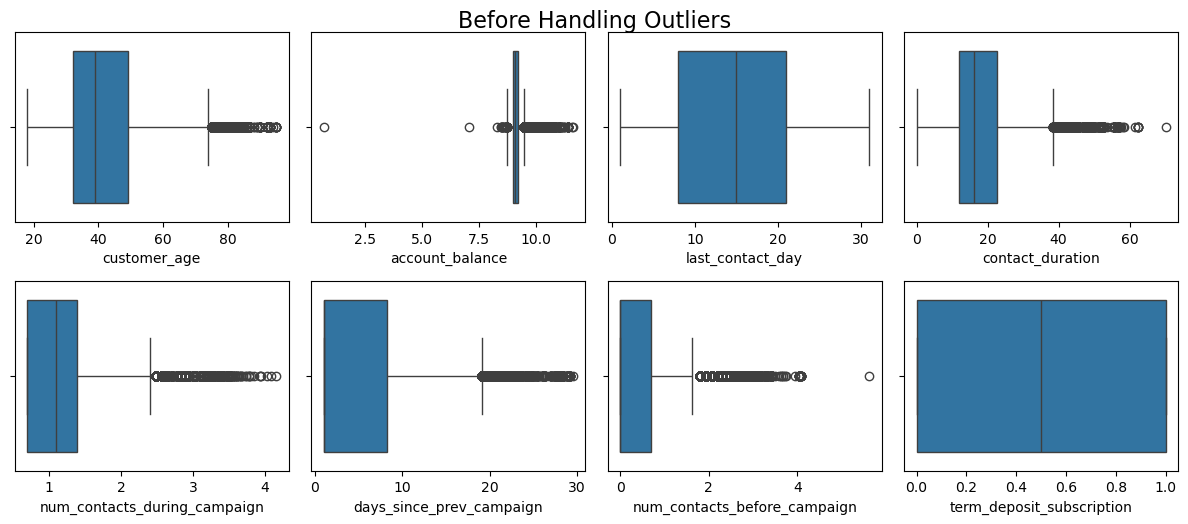

In [461]:
numeric_columns = bank_df_resampled_skew.select_dtypes(include=['int64', 'float64']).columns
# check outliers
plt.figure(figsize=(12,15))
plt.suptitle("Before Handling Outliers", fontsize = 16)
index = 1
for col in numeric_columns:
    plt.subplot(6,4,index)
    sns.boxplot(x=bank_df_resampled_skew[col])
    index+=1
plt.tight_layout()
plt.show()

#### Cap outliers with IQR method and make a new df 'bank_df_resampled_skew_IQR'

In [462]:
bank_df_resampled_skew_IQR = bank_df_resampled_skew.copy() # make a df copy to make outlier capped df with IQR method
for col in ['customer_age','account_balance','contact_duration','num_contacts_during_campaign', 'days_since_prev_campaign','num_contacts_before_campaign']:
    Q1 = bank_df_resampled_skew_IQR[col].quantile(0.25)
    Q3 = bank_df_resampled_skew_IQR[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    bank_df_resampled_skew_IQR[col] = np.where(bank_df_resampled_skew_IQR[col] < lower_bound, lower_bound, np.where(bank_df_resampled_skew_IQR[col] > upper_bound, upper_bound, bank_df_resampled_skew_IQR[col]))

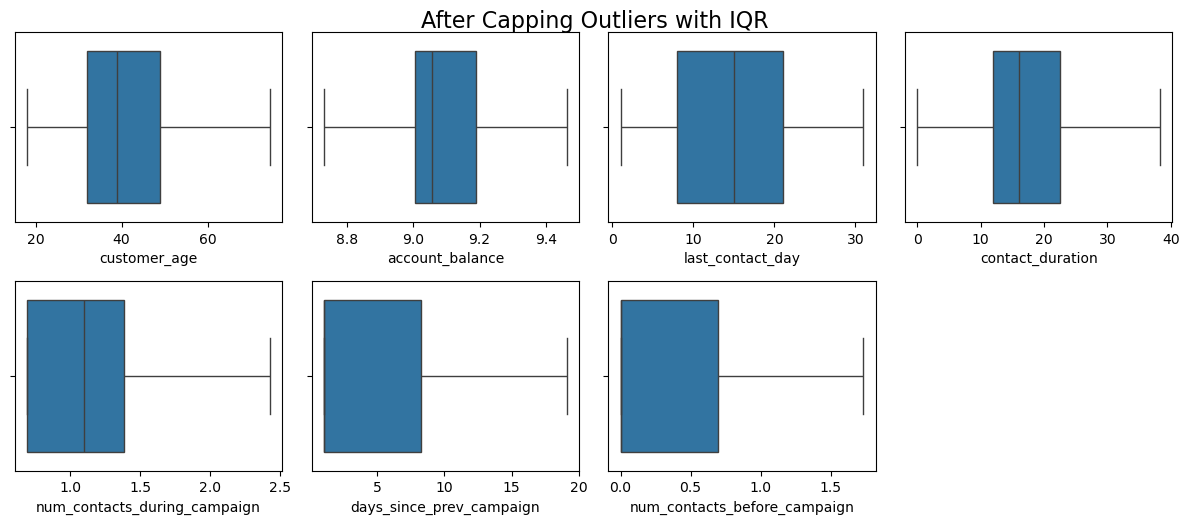

In [419]:
numeric_columns = bank_df_resampled_skew_IQR.select_dtypes(include=['int64', 'float64']).columns
# check outliers after capping with IQR
plt.figure(figsize=(12,15))
plt.suptitle("After Capping Outliers with IQR", fontsize = 16)
index = 1
for col in numeric_columns:
    plt.subplot(6,4,index)
    sns.boxplot(x=bank_df_resampled_skew_IQR[col])
    index+=1
plt.tight_layout()
plt.show()

In [465]:
print("Skewness after outlier treatment:\n", bank_df_resampled_skew_IQR[numeric_columns].skew())

Skewness after outlier treatment:
 customer_age                    0.699861
account_balance                 1.105377
last_contact_day                0.126157
contact_duration                0.674506
num_contacts_during_campaign    1.053164
days_since_prev_campaign        1.423908
num_contacts_before_campaign    1.515379
term_deposit_subscription       0.000000
dtype: float64


In [467]:
numeric_columns = bank_df_resampled_skew_IQR.select_dtypes(include=['int64', 'float64']).columns
# check distribution and outliers after skewness treatment
plt.figure(figsize=(12,15))
plt.suptitle("After Transformation", fontsize = 16)
index = 1
for col in numeric_columns:
    plt.subplot(10,2,index)
   # sns.boxplot(x=bank_df_resampled_skew[col])
    sns.histplot(data=bank_df_resampled_skew_IQR,x=col,kde=True)
    index+=1
plt.tight_layout()
plt.show()

In [469]:
bank_df_resampled_skew_IQR

customer_age      job_type marital_status education_level  \
0              58.0    management        married        tertiary   
1              44.0    technician         single       secondary   
2              33.0  entrepreneur        married       secondary   
3              47.0   blue-collar        married         unknown   
4              33.0       unknown         single         unknown   
...             ...           ...            ...             ...   
79839          53.0        admin.        married       secondary   
79840          43.0    management        married        tertiary   
79841          38.0    management        married        tertiary   
79842          53.0   blue-collar         single       secondary   
79843          42.0    technician        married        tertiary   

      has_default_credit  account_balance has_housing_loan has_personal_loan  \
0                     no         9.226607              yes                no   
1                     no         8.993427              yes                no   
2                     no         8.990068              yes               yes   
3                     no         9.161885              yes                no   
4                     no         8.989943               no                no   
...                  ...              ...              ...               ...   
79839                 no         9.191871               no                no   
79840                 no         8.989818               no                no   
79841                 no         9.054505              yes                no   
79842                 no         9.107754               no                no   
79843                 no         9.080004               no                no   

      contact_type  last_contact_day last_contact_month  contact_duration  \
0          unknown                 5                may         16.155494   
1          unknown                 5                may         12.288206   
2          unknown                 5                may          8.717798   
3          unknown                 5                may          9.591663   
4          unknown                 5                may         14.071247   
...            ...               ...                ...               ...   
79839    telephone                16                mar         17.175564   
79840     cellular                14                jul         33.955854   
79841     cellular                22                jul         15.748016   
79842     cellular                13                may         19.824228   
79843     cellular                10                feb         12.409674   

       num_contacts_during_campaign  days_since_prev_campaign  \
0                          0.693147                  1.000000   
1                          0.693147                  1.000000   
2                          0.693147                  1.000000   
3                          0.693147                  1.000000   
4                          0.693147                  1.000000   
...                             ...                       ...   
79839                      0.693147                  9.643651   
79840                      1.386294                  1.000000   
79841                      0.693147                  1.000000   
79842                      0.693147                  9.273618   
79843                      0.693147                  1.000000   

       num_contacts_before_campaign prev_campaign_outcome  \
0                          0.000000               unknown   
1                          0.000000               unknown   
2                          0.000000               unknown   
3                          0.000000               unknown   
4                          0.000000               unknown   
...                             ...                   ...   
79839                      1.098612               success   
79840                      0.000000

#### Cap outliers with Zscore method and make a new df 'bank_df_resampled_skew_Zscore

In [471]:
from scipy.stats import zscore

In [473]:
bank_df_resampled_skew_Zscore = bank_df_resampled_skew.copy() # make a df copy to make outlier capped df with z score methode
for col in ['customer_age','account_balance','contact_duration','num_contacts_during_campaign', 'days_since_prev_campaign','num_contacts_before_campaign']:             
    z_score = zscore(bank_df_resampled_skew_Zscore[col])         # calculate the Z-score for the column
    outlier_mask = np.abs(z_score) > 3 # make mask of outliers
    upper_bound = bank_df_resampled_skew_Zscore[col][~outlier_mask].max() # invert the mask and get the max of non outlier value
    lower_bound = bank_df_resampled_skew_Zscore[col][~outlier_mask].min() # invert the mask and get the min of non outlier value
    bank_df_resampled_skew_Zscore[col] = np.where(z_score > 3, upper_bound, np.where(z_score < -3, lower_bound, bank_df_resampled_skew_Zscore[col])) # cap the outlier values

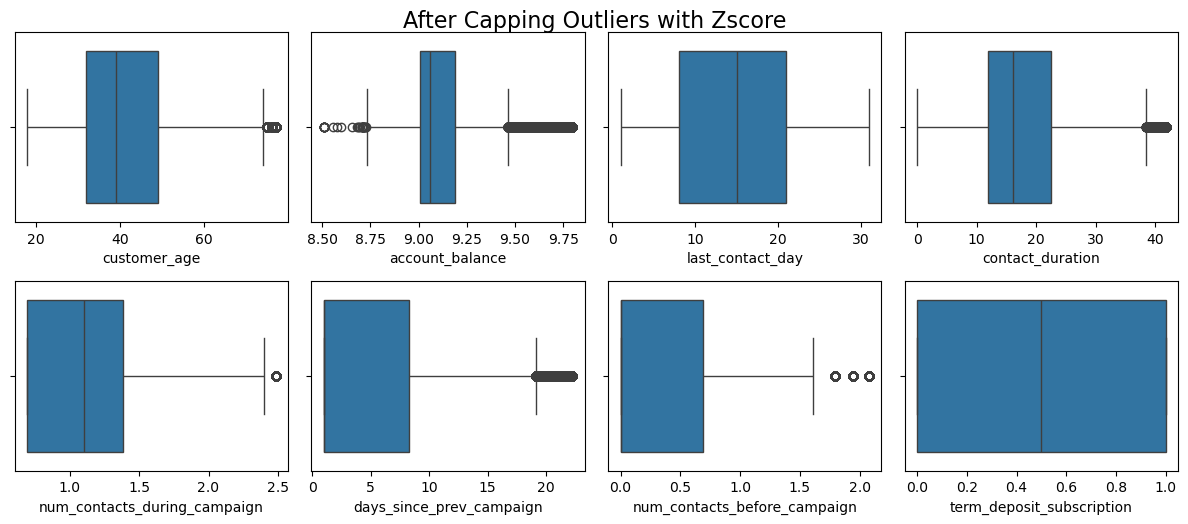

In [475]:
numeric_columns = bank_df_resampled_skew_Zscore.select_dtypes(include=['int64', 'float64']).columns
# check outliers after capping with Zscore
plt.figure(figsize=(12,15))
plt.suptitle("After Capping Outliers with Zscore", fontsize = 16)
index = 1
for col in numeric_columns:
    plt.subplot(6,4,index)
    sns.boxplot(x=bank_df_resampled_skew_Zscore[col])
    index+=1
plt.tight_layout()
plt.show()

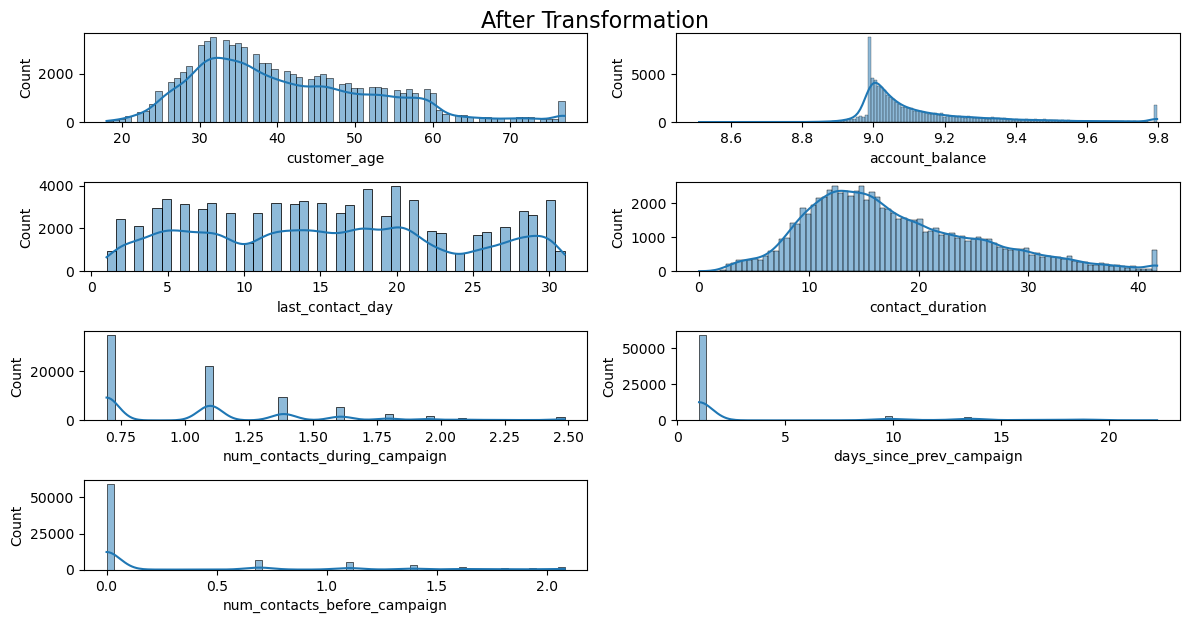

In [433]:
numeric_columns = bank_df_resampled_skew_Zscore.select_dtypes(include=['int64', 'float64']).columns
# check distribution and outliers after skewness treatment
plt.figure(figsize=(12,15))
plt.suptitle("After Transformation", fontsize = 16)
index = 1
for col in numeric_columns:
    plt.subplot(10,2,index)
   # sns.boxplot(x=bank_df_resampled_skew[col])
    sns.histplot(data=bank_df_resampled_skew_Zscore,x=col,kde=True)
    index+=1
plt.tight_layout()
plt.show()

In [477]:
bank_df_resampled_skew_IQR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79844 entries, 0 to 79843
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_age                  79844 non-null  float64
 1   job_type                      79844 non-null  object 
 2   marital_status                79844 non-null  object 
 3   education_level               79844 non-null  object 
 4   has_default_credit            79844 non-null  object 
 5   account_balance               79844 non-null  float64
 6   has_housing_loan              79844 non-null  object 
 7   has_personal_loan             79844 non-null  object 
 8   contact_type                  79844 non-null  object 
 9   last_contact_day              79844 non-null  int64  
 10  last_contact_month            79844 non-null  object 
 11  contact_duration              79844 non-null  float64
 12  num_contacts_during_campaign  79844 non-null  float64
 13  d

In [479]:
# Select only numeric columns
numeric_data = bank_df_resampled_skew_IQR.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

correlation_matrix

customer_age  account_balance  last_contact_day  \
customer_age                      1.000000         0.140034         -0.000635   
account_balance                   0.140034         1.000000          0.012830   
last_contact_day                 -0.000635         0.012830          1.000000   
contact_duration                  0.000313         0.041785         -0.021293   
num_contacts_during_campaign     -0.000601        -0.033924          0.120923   
days_since_prev_campaign          0.011917         0.060099         -0.069482   
num_contacts_before_campaign      0.031238         0.082766         -0.067015   
term_deposit_subscription         0.032652         0.134905         -0.043078   

                              contact_duration  num_contacts_during_campaign  \
customer_age                          0.000313                     -0.000601   
account_balance                       0.041785                     -0.033924   
last_contact_day                     -0.021293                      0.120923   
contact_duration                      1.000000                     -0.033333   
num_contacts_during_campaign         -0.033333                      1.000000   
days_since_prev_campaign             -0.013281                     -0.129325   
num_contacts_before_campaign         -0.015335                     -0.118123   
term_deposit_subscription             0.514993                     -0.141856   

                              days_since_prev_campaign  \
customer_age                                  0.011917   
account_balance                               0.060099   
last_contact_day                             -0.069482   
contact_duration                             -0.013281   
num_contacts_during_campaign                 -0.129325   
days_since_prev_campaign                      1.000000   
num_contacts_before_campaign                  0.864294   
term_deposit_subscription                     0.185728   

                              num_contacts_before_campaign  \
customer_age                                      0.031238   
account_balance                                   0.082766   
last_contact_day                                 -0.067015   
contact_duration                                 -0.015335   
num_contacts_during_campaign                     -0.118123   
days_since_prev_campaign                          0.864294   
num_contacts_before_campaign                      1.000000   
term_deposit_subscription                         0.223913   

                              term_deposit_subscription  
customer_age                                   0.032652  
account_balance                                0.134905  
last_contact_day                              -0.043078  
contact_duration                               0.514993  
num_contacts_during_campaign                  -0.141856  
days_since_prev_campaign                       0.185728  
num_contacts_before_campaign                   0.223913  
term_deposit_subscription                      1.000000

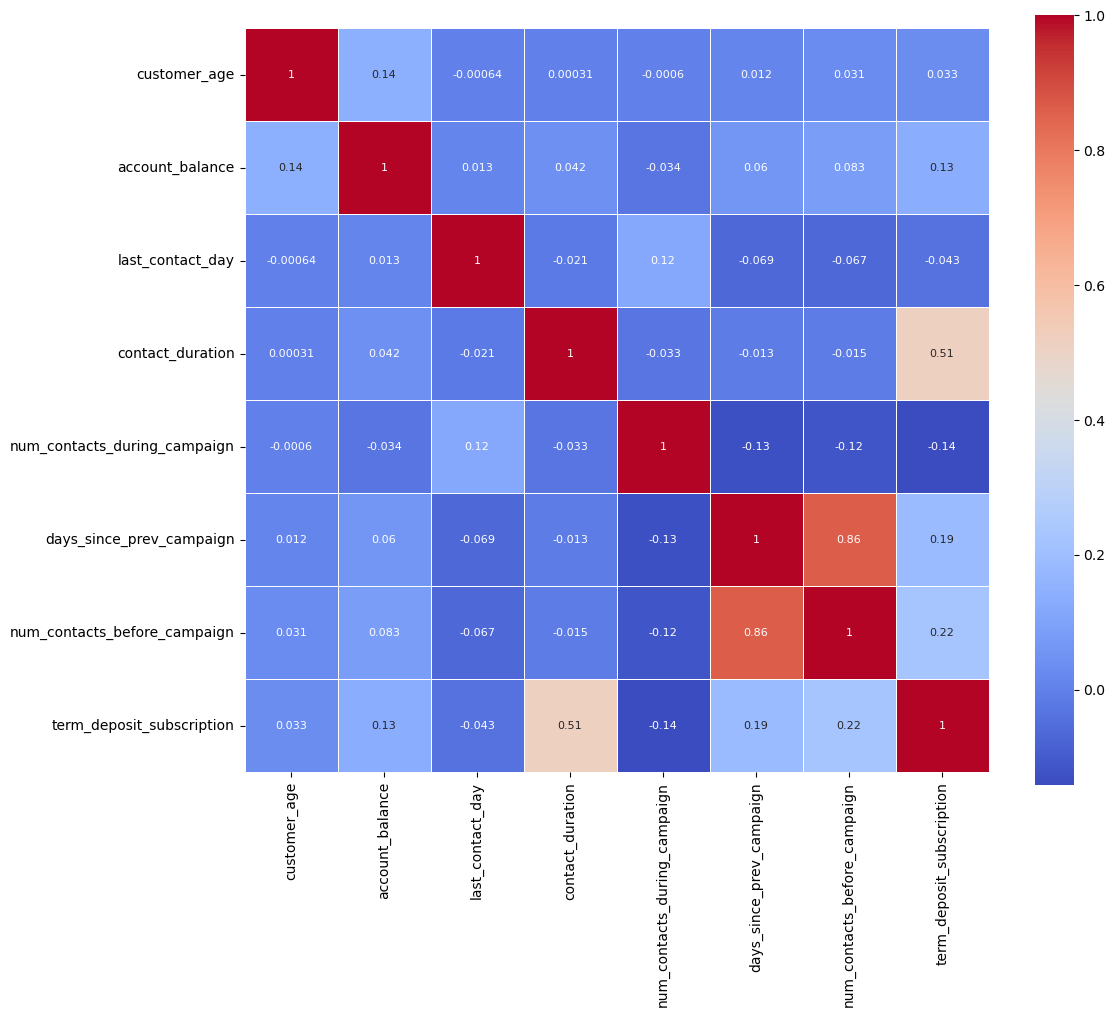

In [481]:
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, linewidths=.5, annot_kws={"size": 8} )# Adjust font size and other parameters
plt.show()

### Correlation Matrix Analysis  
A **correlation matrix** is a table showing the correlation coefficients between variables in a dataset. Each cell represents the strength and direction of the relationship between two variables, measured using correlation coefficients like **Pearson's (linear relationships)**, **Spearman's (ranked relationships)**, or **Kendall's (ordinal data)**.

### How to Read a Correlation Matrix:  
1. **Values**:
   - Correlation values range from **-1 to +1**:
     - **+1**: Perfect positive correlation (as one increases, the other increases).
     - **0**: No correlation.
     - **-1**: Perfect negative correlation (as one increases, the other decreases).

2. **Diagonal**:
   - Always **1** since each variable is perfectly correlated with itself.

3. **Symmetry**:
   - The matrix is symmetric around the diagonal.

4. **Interpret Relationships**:
   - **Strong correlations**: |r| > 0.7 (either positive or negative).
   - **Moderate correlations**: 0.3 ≤ |r| ≤ 0.7.
   - **Weak correlations**: |r| < 0.3.

5. **Identify Patterns**:
   - Look for highly correlated variables to detect redundancy or multicollinearity (important in regression analysis).
   - Use heatmaps for visual clarity, where colors represent correlation stengthReport o
These model shows a fair and smooth correlation all over the dataset that may affect predictions.  

<h2 style="color: Red; font-family: Arial; font-weight: bold;text-align:left">Feature Engineering</h2>

We have job_type', 'marital_status', 'education_level', 'has_default_credit','has_housing_loan', 'has_personal_loan', 'contact_type','last_contact_month', 'prev_campaign_outcome' as Object Type.

# Columns to encode

nominal_columns = ['job_type', 'marital_status', 'contact_type', 'prev_campaign_outcome']

ordinal_columns = ['last_contact_month','education_level']  # Assuming there's an order in education levels

binary_columns = ['has_default_credit', 'has_housing_loan', 'has_personal_loan']

In [486]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

# Columns to encode
nominal_columns = ['job_type', 'marital_status', 'contact_type', 'prev_campaign_outcome']
ordinal_columns = ['last_contact_month','education_level']  # Assuming there's an order in education levels
binary_columns = ['has_default_credit', 'has_housing_loan', 'has_personal_loan']



In [488]:
print(bank_df_resampled_skew_IQR['last_contact_month'])

0        may
1        may
2        may
3        may
4        may
        ... 
79839    mar
79840    jul
79841    jul
79842    may
79843    feb
Name: last_contact_month, Length: 79844, dtype: object


In [532]:

bank_df_resampled_skew_IQR_ord=bank_df_resampled_skew_IQR.copy()

# Define the order for each ordinal column
last_contact_month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
# Initialize OrdinalEncoder with custom categories
oe=OrdinalEncoder(categories=[last_contact_month_order])

# Apply ordinal encoding and transform the columns
bank_df_resampled_skew_IQR_ord['last_contact_month']=oe.fit_transform(bank_df_resampled_skew_IQR_ord[['last_contact_month']]).astype('int64') + 1
# Display a sample of the transformed DataFrame
print(bank_df_resampled_skew_IQR_ord['last_contact_month'])


0        5
1        5
2        5
3        5
4        5
        ..
79839    3
79840    7
79841    7
79842    5
79843    2
Name: last_contact_month, Length: 79844, dtype: int64


In [534]:
bank_df_resampled_skew_IQR_ord_edumap=bank_df_resampled_skew_IQR_ord.copy()
education_mapping = {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
bank_df_resampled_skew_IQR_ord_edumap['education_level'] = bank_df_resampled_skew_IQR_ord_edumap['education_level'].map(education_mapping)
bank_df_resampled_skew_IQR_ord_edumap

customer_age      job_type marital_status  education_level  \
0              58.0    management        married                3   
1              44.0    technician         single                2   
2              33.0  entrepreneur        married                2   
3              47.0   blue-collar        married                0   
4              33.0       unknown         single                0   
...             ...           ...            ...              ...   
79839          53.0        admin.        married                2   
79840          43.0    management        married                3   
79841          38.0    management        married                3   
79842          53.0   blue-collar         single                2   
79843          42.0    technician        married                3   

      has_default_credit  account_balance has_housing_loan has_personal_loan  \
0                     no         9.226607              yes                no   
1                     no         8.993427              yes                no   
2                     no         8.990068              yes               yes   
3                     no         9.161885              yes                no   
4                     no         8.989943               no                no   
...                  ...              ...              ...               ...   
79839                 no         9.191871               no                no   
79840                 no         8.989818               no                no   
79841                 no         9.054505              yes                no   
79842                 no         9.107754               no                no   
79843                 no         9.080004               no                no   

      contact_type  last_contact_day  last_contact_month  contact_duration  \
0          unknown                 5                   5         16.155494   
1          unknown                 5                   5         12.288206   
2          unknown                 5                   5          8.717798   
3          unknown                 5                   5          9.591663   
4          unknown                 5                   5         14.071247   
...            ...               ...                 ...               ...   
79839    telephone                16                   3         17.175564   
79840     cellular                14                   7         33.955854   
79841     cellular                22                   7         15.748016   
79842     cellular                13                   5         19.824228   
79843     cellular                10                   2         12.409674   

       num_contacts_during_campaign  days_since_prev_campaign  \
0                          0.693147                  1.000000   
1                          0.693147                  1.000000   
2                          0.693147                  1.000000   
3                          0.693147                  1.000000   
4                          0.693147                  1.000000   
...                             ...                       ...   
79839                      0.693147                  9.643651   
79840                      1.386294                  1.000000   
79841                      0.693147                  1.000000   
79842                      0.693147                  9.273618   
79843                      0.693147                  1.000000   

       num_contacts_before_campaign prev_campaign_outcome  \
0                          0.000000               unknown   
1                          0.000000               unknown   
2                          0.000000               unknown   
3                          0.000000               unknown   
4                          0.000000               unknown   
...                             ...                   ...   
79839                      1.098612               success   
79840      

In [536]:
bank_df_resampled_skew_IQR_ord_edumap["education_level"].value_counts()

education_level
2    39263
3    26390
1    10754
0     3437
Name: count, dtype: int64

In [538]:
bank_df_resampled_skew_IQR_encoded=bank_df_resampled_skew_IQR_ord_edumap.copy()
# Ensure binary columns are 0/1
binary_mapping = {'yes': 1, 'no': 0}
for col in binary_columns:
    bank_df_resampled_skew_IQR_encoded[col] = bank_df_resampled_skew_IQR_encoded[col].map(binary_mapping)
# Display the transformed DataFrame
bank_df_resampled_skew_IQR_encoded.head()

customer_age      job_type marital_status  education_level  \
0          58.0    management        married                3   
1          44.0    technician         single                2   
2          33.0  entrepreneur        married                2   
3          47.0   blue-collar        married                0   
4          33.0       unknown         single                0   

   has_default_credit  account_balance  has_housing_loan  has_personal_loan  \
0                   0         9.226607                 1                  0   
1                   0         8.993427                 1                  0   
2                   0         8.990068                 1                  1   
3                   0         9.161885                 1                  0   
4                   0         8.989943                 0                  0   

  contact_type  last_contact_day  last_contact_month  contact_duration  \
0      unknown                 5                   5         16.155494   
1      unknown                 5                   5         12.288206   
2      unknown                 5                   5          8.717798   
3      unknown                 5                   5          9.591663   
4      unknown                 5                   5         14.071247   

   num_contacts_during_campaign  days_since_prev_campaign  \
0                      0.693147                       1.0   
1                      0.693147                       1.0   
2                      0.693147                       1.0   
3                      0.693147                       1.0   
4                      0.693147                       1.0   

   num_contacts_before_campaign prev_campaign_outcome  \
0                           0.0               unknown   
1                           0.0               unknown   
2                           0.0               unknown   
3                           0.0               unknown   
4                           0.0               unknown   

   term_deposit_subscription  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [540]:
print(bank_df_resampled_skew_IQR_encoded["has_default_credit"].value_counts())
print(bank_df_resampled_skew_IQR_encoded["has_housing_loan"].value_counts())
print(bank_df_resampled_skew_IQR_encoded["has_personal_loan"].value_counts())

has_default_credit
0    78677
1     1167
Name: count, dtype: int64
has_housing_loan
0    42184
1    37660
Name: count, dtype: int64
has_personal_loan
0    69455
1    10389
Name: count, dtype: int64


In [542]:
# Apply One-Hot Encoding to nominal categorical variables
bank_df_resampled_skew_IQR_encoded= pd.get_dummies(bank_df_resampled_skew_IQR_encoded,columns=nominal_columns)
bank_df_resampled_skew_IQR_encoded.head()


customer_age  education_level  has_default_credit  account_balance  \
0          58.0                3                   0         9.226607   
1          44.0                2                   0         8.993427   
2          33.0                2                   0         8.990068   
3          47.0                0                   0         9.161885   
4          33.0                0                   0         8.989943   

   has_housing_loan  has_personal_loan  last_contact_day  last_contact_month  \
0                 1                  0                 5                   5   
1                 1                  0                 5                   5   
2                 1                  1                 5                   5   
3                 1                  0                 5                   5   
4                 0                  0                 5                   5   

   contact_duration  num_contacts_during_campaign  ...  \
0         16.155494                      0.693147  ...   
1         12.288206                      0.693147  ...   
2          8.717798                      0.693147  ...   
3          9.591663                      0.693147  ...   
4         14.071247                      0.693147  ...   

   marital_status_divorced  marital_status_married  marital_status_single  \
0                    False                    True                  False   
1                    False                   False                   True   
2                    False                    True                  False   
3                    False                    True                  False   
4                    False                   False                   True   

   contact_type_cellular  contact_type_telephone  contact_type_unknown  \
0                  False                   False                  True   
1                  False                   False                  True   
2                  False                   False                  True   
3                  False                   False                  True   
4                  False                   False                  True   

   prev_campaign_outcome_failure  prev_campaign_outcome_other  \
0                          False                        False   
1                          False                        False   
2                          False                        False   
3                          False                        False   
4                          False                        False   

   prev_campaign_outcome_success  prev_campaign_outcome_unknown  
0                          False                           True  
1                          False                           True  
2                          False                           True  
3                          False                           True  
4                          False                           True  

[5 rows x 35 columns]

In [544]:
bank_df_resampled_skew_IQR_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79844 entries, 0 to 79843
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_age                   79844 non-null  float64
 1   education_level                79844 non-null  int64  
 2   has_default_credit             79844 non-null  int64  
 3   account_balance                79844 non-null  float64
 4   has_housing_loan               79844 non-null  int64  
 5   has_personal_loan              79844 non-null  int64  
 6   last_contact_day               79844 non-null  int64  
 7   last_contact_month             79844 non-null  int64  
 8   contact_duration               79844 non-null  float64
 9   num_contacts_during_campaign   79844 non-null  float64
 10  days_since_prev_campaign       79844 non-null  float64
 11  num_contacts_before_campaign   79844 non-null  float64
 12  term_deposit_subscription      79844 non-null 

In [504]:
enc = OneHotEncoder(sparse_output=False, drop='first')

# Step 2: Fit and transform the 'Sex' and 'Embarked' columns
encoded = enc.fit_transform(bank_df_resampled_skew_IQR[nominal_columns])  # fit_transform directly

# Step 3: Convert the encoded result into a DataFrame
encoded_df = pd.DataFrame(encoded, columns=enc.get_feature_names_out(nominal_columns))
encoded_df

job_type_blue-collar  job_type_entrepreneur  job_type_housemaid  \
0                       0.0                    0.0                 0.0   
1                       0.0                    0.0                 0.0   
2                       0.0                    1.0                 0.0   
3                       1.0                    0.0                 0.0   
4                       0.0                    0.0                 0.0   
...                     ...                    ...                 ...   
79839                   0.0                    0.0                 0.0   
79840                   0.0                    0.0                 0.0   
79841                   0.0                    0.0                 0.0   
79842                   1.0                    0.0                 0.0   
79843                   0.0                    0.0                 0.0   

       job_type_management  job_type_retired  job_type_self-employed  \
0                      1.0               0.0                     0.0   
1                      0.0               0.0                     0.0   
2                      0.0               0.0                     0.0   
3                      0.0               0.0                     0.0   
4                      0.0               0.0                     0.0   
...                    ...               ...                     ...   
79839                  0.0               0.0                     0.0   
79840                  1.0               0.0                     0.0   
79841                  1.0               0.0                     0.0   
79842                  0.0               0.0                     0.0   
79843                  0.0               0.0                     0.0   

       job_type_services  job_type_student  job_type_technician  \
0                    0.0               0.0                  0.0   
1                    0.0               0.0                  1.0   
2                    0.0               0.0                  0.0   
3                    0.0               0.0                  0.0   
4                    0.0               0.0                  0.0   
...                  ...               ...                  ...   
79839                0.0               0.0                  0.0   
79840                0.0               0.0                  0.0   
79841                0.0               0.0                  0.0   
79842                0.0               0.0                  0.0   
79843                0.0               0.0                  1.0   

       job_type_unemployed  job_type_unknown  marital_status_married  \
0                      0.0               0.0                     1.0   
1                      0.0               0.0                     0.0   
2                      0.0               0.0                     1.0   
3                      0.0               0.0                     1.0   
4                      0.0               1.0                     0.0   
...                    ...               ...                     ...   
79839                  0.0               0.0                     1.0   
79840                  0.0               0.0                     1.0   
79841                  0.0               0.0                     1.0   
79842                  0.0               0.0                     0.0   
79843                  0.0               0.0                     1.0   

       marital_status_single  contact_type_telephone  contact_type_unknown  \
0                        0.0                     0.0                   1.0   
1                        1.0                     0.0                   1.0   
2                        0.0                     0.0                   1.0   
3                        0.0                     0.0                   1.0   
4                        1.0                     0.0                   1.0   
...                      ...                     ...                   ...   
79839                    0.0         

In [506]:
# Concatenate the one-hot encoded columns and drop the original nominal columns
bank_df_resampled_skew_IQR_encoded = pd.concat([df.drop(columns=nominal_columns), encoded_df], axis=1)

NameError: name 'df' is not defined

In [ ]:
# Fill NaN values with a placeholder before applying one-hot encoding
bank_df_resampled_skew_IQR[nominal_columns] = bank_df_resampled_skew_IQR[nominal_columns].fillna('Unknown')

# Apply one-hot encoding
bank_df_resampled_skew_IQR_encoded = pd.get_dummies(bank_df_resampled_skew_IQR, columns=nominal_columns)
# Ensure binary values (0 and 1)
bank_df_resampled_skew_IQR_encoded = bank_df_resampled_skew_IQR_encoded.astype(int64)

# Display the result
print(bank_df_resampled_skew_IQR_encoded.head())

In [ ]:
# Concatenate the one-hot encoded columns and drop the original nominal columns
bank_df_resampled_skew_IQR_encoded = bank_df_resampled_skew_IQR.copy()
bank_df_resampled_skew_IQR_encoded = pd.concat([bank_df_resampled_skew_IQR_encoded .drop(columns=nominal_columns), nominal_encoded], axis=1)
# Display the transformed DataFrame
bank_df_resampled_skew_IQR_encoded.head()

In [514]:
bank_df_resampled_skew_IQR_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79844 entries, 0 to 79843
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_age                   79844 non-null  float64
 1   education_level                79844 non-null  int64  
 2   has_default_credit             79844 non-null  int64  
 3   account_balance                79844 non-null  float64
 4   has_housing_loan               79844 non-null  int64  
 5   has_personal_loan              79844 non-null  int64  
 6   last_contact_day               79844 non-null  int64  
 7   last_contact_month             79844 non-null  int64  
 8   contact_duration               79844 non-null  float64
 9   num_contacts_during_campaign   79844 non-null  float64
 10  days_since_prev_campaign       79844 non-null  float64
 11  num_contacts_before_campaign   79844 non-null  float64
 12  term_deposit_subscription      79844 non-null 

In [528]:
# Select only numeric columns
numeric_data = bank_df_resampled_skew_IQR.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

correlation_matrix

customer_age  account_balance  last_contact_day  \
customer_age                      1.000000         0.140034         -0.000635   
account_balance                   0.140034         1.000000          0.012830   
last_contact_day                 -0.000635         0.012830          1.000000   
contact_duration                  0.000313         0.041785         -0.021293   
num_contacts_during_campaign     -0.000601        -0.033924          0.120923   
days_since_prev_campaign          0.011917         0.060099         -0.069482   
num_contacts_before_campaign      0.031238         0.082766         -0.067015   
term_deposit_subscription         0.032652         0.134905         -0.043078   

                              contact_duration  num_contacts_during_campaign  \
customer_age                          0.000313                     -0.000601   
account_balance                       0.041785                     -0.033924   
last_contact_day                     -0.021293                      0.120923   
contact_duration                      1.000000                     -0.033333   
num_contacts_during_campaign         -0.033333                      1.000000   
days_since_prev_campaign             -0.013281                     -0.129325   
num_contacts_before_campaign         -0.015335                     -0.118123   
term_deposit_subscription             0.514993                     -0.141856   

                              days_since_prev_campaign  \
customer_age                                  0.011917   
account_balance                               0.060099   
last_contact_day                             -0.069482   
contact_duration                             -0.013281   
num_contacts_during_campaign                 -0.129325   
days_since_prev_campaign                      1.000000   
num_contacts_before_campaign                  0.864294   
term_deposit_subscription                     0.185728   

                              num_contacts_before_campaign  \
customer_age                                      0.031238   
account_balance                                   0.082766   
last_contact_day                                 -0.067015   
contact_duration                                 -0.015335   
num_contacts_during_campaign                     -0.118123   
days_since_prev_campaign                          0.864294   
num_contacts_before_campaign                      1.000000   
term_deposit_subscription                         0.223913   

                              term_deposit_subscription  
customer_age                                   0.032652  
account_balance                                0.134905  
last_contact_day                              -0.043078  
contact_duration                               0.514993  
num_contacts_during_campaign                  -0.141856  
days_since_prev_campaign                       0.185728  
num_contacts_before_campaign                   0.223913  
term_deposit_subscription                      1.000000

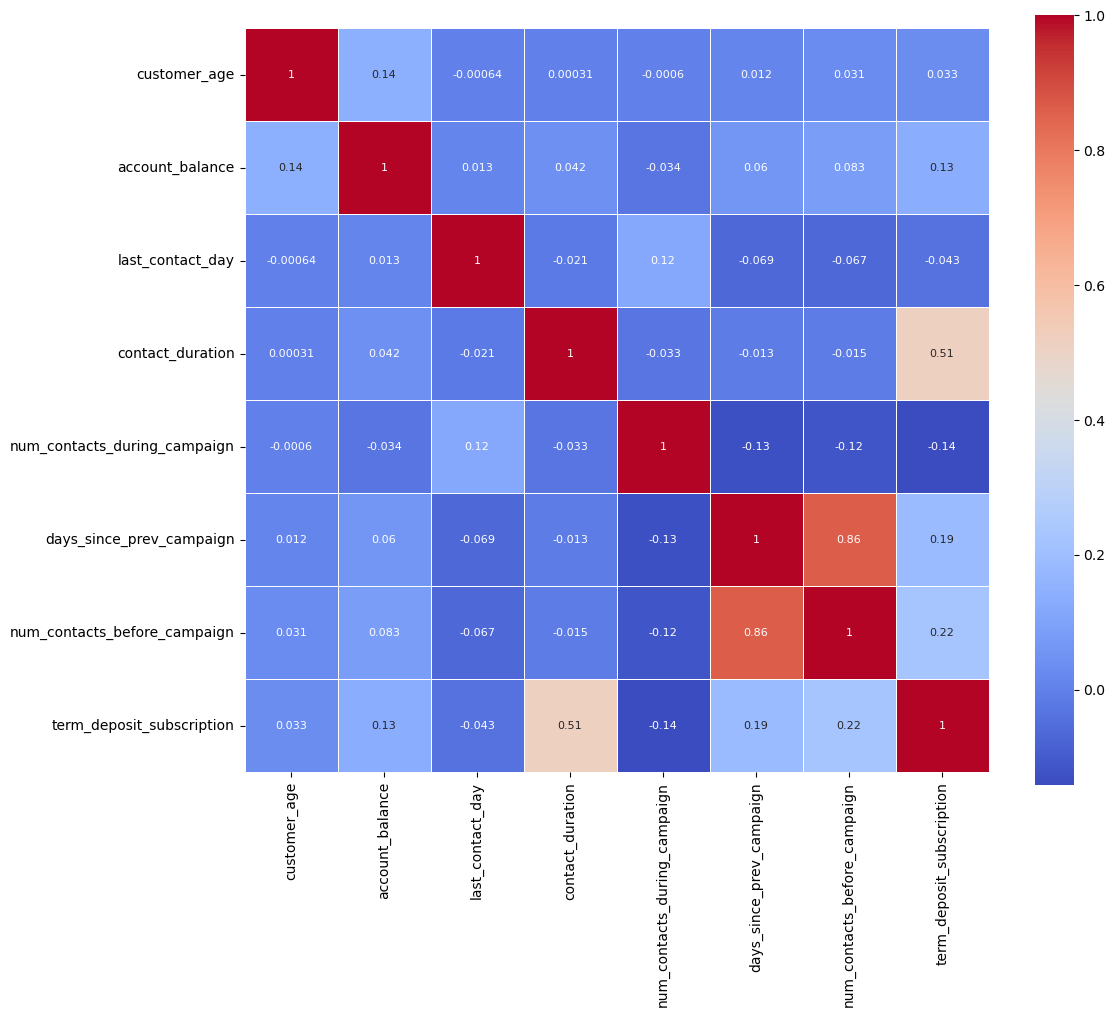

In [530]:
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, linewidths=.5, annot_kws={"size": 8} )# Adjust font size and other parameters
plt.show()

In [577]:
# Define feature matrix and target variable
X = bank_df_resampled_skew_IQR_encoded.drop(columns=['term_deposit_subscription'])  # Drop the target column to get only features
y = bank_df_resampled_skew_IQR_encoded['term_deposit_subscription']


In [579]:
from sklearn.feature_selection import SelectKBest, f_classif


# Apply SelectKBest with ANOVA F-value (f_classif) for classification tasks
selector = SelectKBest(score_func=f_classif, k=20)  # Select top 10 features
X_new = selector.fit_transform(X, y)

# Get scores for each feature
scores = selector.scores_

# Create a DataFrame to view feature scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Print top features based on scores
print("Feature Scores:")
print(feature_scores)

# Get selected features
selected_features = feature_scores['Feature'].head(20).tolist()
print("\nTop 20 Selected Features:")
print(selected_features)

# Update the dataset with selected features
X_selected = X[selected_features]


Feature Scores:
                          Feature         Score
8                contact_duration  28818.844345
32  prev_campaign_outcome_success   7335.455161
29           contact_type_unknown   6075.470149
33  prev_campaign_outcome_unknown   4482.859646
27          contact_type_cellular   4426.575277
11   num_contacts_before_campaign   4214.325198
4                has_housing_loan   4023.302929
10       days_since_prev_campaign   2852.539790
9    num_contacts_during_campaign   1639.657555
3                 account_balance   1480.000733
13           job_type_blue-collar   1264.808671
5               has_personal_loan   1099.666552
17               job_type_retired    910.928844
26          marital_status_single    703.517747
20               job_type_student    702.231896
25         marital_status_married    660.231273
1                 education_level    522.677836
16            job_type_management    191.897801
31    prev_campaign_outcome_other    171.987730
6                last_co

In [581]:
from sklearn.model_selection import train_test_split
# Separate features and target variable
X = X_selected  # Use the selected features from SelectKBest
y = bank_df_resampled_skew_IQR_encoded['term_deposit_subscription']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to verify split
print(f"Training set size: {X_train.shape}, {y_train.shape}")
print(f"Testing set size: {X_test.shape}, {y_test.shape}")# Split data


Training set size: (63875, 20), (63875,)
Testing set size: (15969, 20), (15969,)


In [585]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.fit_transform(X_test)

<h2 style="color: Red; font-family: Arial; font-weight: bold;text-align:left">Machine Learning Model Implementation</h2>

In [598]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 6.4 MB/s eta 0:00:20
   ---------------------------------------- 0.1/124.9 MB 2.1 MB/s eta 0:01:00
   ---------------------------------------- 0.2/124.9 MB 2.1 MB/s eta 0:01:01
   ---------------------------------------- 0.3/124.9 MB 2.3 MB/s eta 0:00:56
   ---------------------------------------- 0.4/124.9 MB 2.1 MB/s eta 0:00:59
   ---------------------------------------- 0.5/124.9 MB 2.2 MB/s eta 0:00:57
   ---------------------------------------- 0.6/124.9 MB 2.2 MB/s eta 0:00:56
   ---------------------------------------- 0.7/124.9 MB 2.3 MB/s eta 0:00:54
   ---------------------------------------- 0.7/124.9 MB 2.1 MB/s eta 0:00:58
   ---------------------------------------- 0.9/124.9 MB 2.3 MB/s eta 0:00:54
   ---------------------------------------- 1.0/124.9 MB 2.3 MB/s eta 0:00:55
   ---------------------------------------- 1.1/124.9 MB 2.5 MB/s eta 0

In [606]:

#importing models
from sklearn.linear_model import LogisticRegression,RidgeClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from xgboost import XGBClassifier 

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve, auc

In [622]:

models = {'logisticregression':LogisticRegression(),
          'decision tree classifier':DecisionTreeClassifier(),
          'random forest classifier': RandomForestClassifier(),
          'gradient boosting classifier':GradientBoostingClassifier(),
          'support vector machine':SVC(probability=True),
          'kneighbors classifier':KNeighborsClassifier(),
          'gaussianNB':GaussianNB(),
          'bernoulliNB':BernoulliNB(),
          'xgb':XGBClassifier()}
     

Model: logisticregression
Best accuracy (Training): 81.73%
Best accuracy (Testing): 81.26%
Accuracy: 81.26%
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      7908
           1       0.82      0.80      0.81      8061

    accuracy                           0.81     15969
   macro avg       0.81      0.81      0.81     15969
weighted avg       0.81      0.81      0.81     15969

Confusion Matrix:
[[6518 1390]
 [1603 6458]]

AUC Score: 0.89


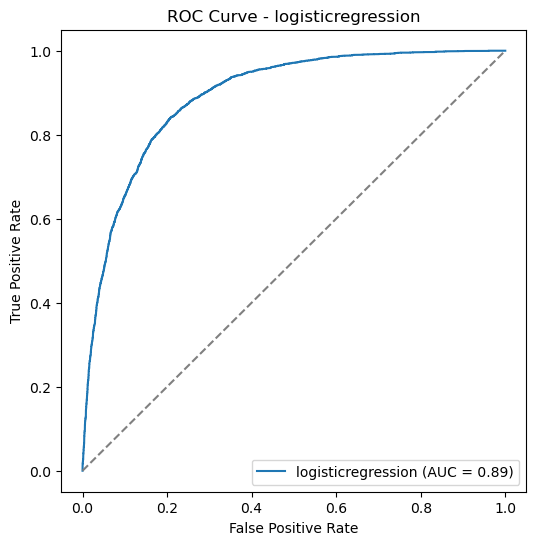


Model: decision tree classifier
Best accuracy (Training): 100.00%
Best accuracy (Testing): 89.28%
Accuracy: 89.28%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      7908
           1       0.91      0.88      0.89      8061

    accuracy                           0.89     15969
   macro avg       0.89      0.89      0.89     15969
weighted avg       0.89      0.89      0.89     15969

Confusion Matrix:
[[7203  705]
 [1007 7054]]

AUC Score: 0.89


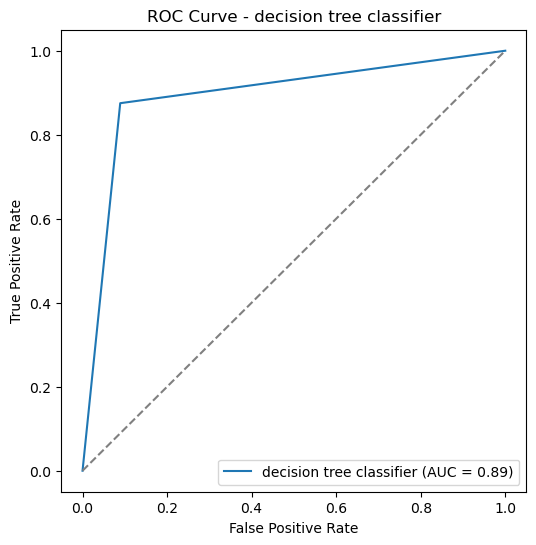


Model: random forest classifier
Best accuracy (Training): 100.00%
Best accuracy (Testing): 96.59%
Accuracy: 96.59%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      7908
           1       0.94      1.00      0.97      8061

    accuracy                           0.97     15969
   macro avg       0.97      0.97      0.97     15969
weighted avg       0.97      0.97      0.97     15969

Confusion Matrix:
[[7388  520]
 [  24 8037]]

AUC Score: 1.00


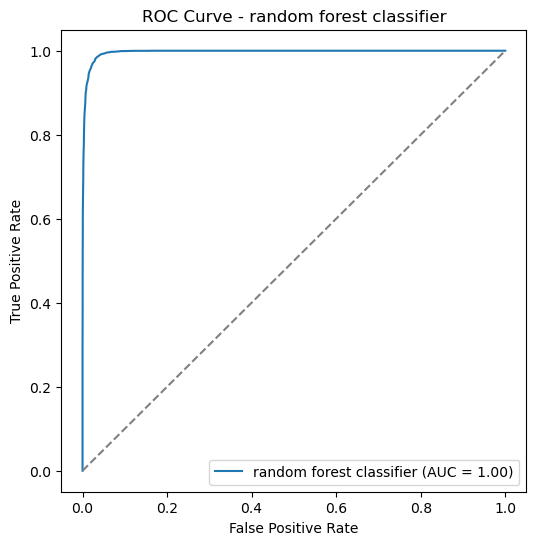


Model: gradient boosting classifier
Best accuracy (Training): 83.90%
Best accuracy (Testing): 82.92%
Accuracy: 82.92%
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      7908
           1       0.82      0.85      0.83      8061

    accuracy                           0.83     15969
   macro avg       0.83      0.83      0.83     15969
weighted avg       0.83      0.83      0.83     15969

Confusion Matrix:
[[6404 1504]
 [1224 6837]]

AUC Score: 0.91


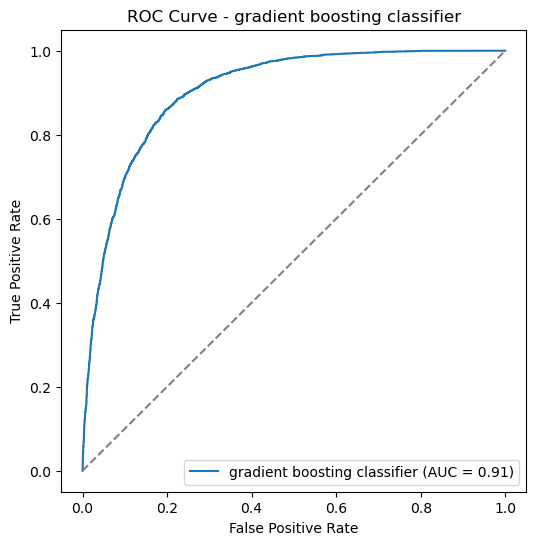

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Evaluate models with metrics and ROC curve
for name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for ROC curve

    # Print Model Name
    print(f"Model: {name}")

    # Calculate Training and Testing Accuracy
    score_list_train = []
    score_list_test = []
    score_list_train.append(model.score(X_train_scaled, y_train))
    score_list_test.append(model.score(X_test_scaled, y_test))
    Accuracy_Train = max(score_list_train)
    Accuracy_Test = max(score_list_test)

    print(f"Best accuracy (Training): {Accuracy_Train * 100:.2f}%")
    print(f"Best accuracy (Testing): {Accuracy_Test * 100:.2f}%")

    # Classification Metrics
    print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print()

    # ROC and AUC
    auc_score = roc_auc_score(y_test, y_pred_proba)
    print(f"AUC Score: {auc_score:.2f}")

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.show()
    print()


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Evaluate models with metrics and ROC curve
for name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Print Model Name
    print(f"Model: {name}")

    # Training and Testing Accuracy
    Accuracy_Train = model.score(X_train_scaled, y_train)
    Accuracy_Test = model.score(X_test_scaled, y_test)

    print(f"Best accuracy (Training): {Accuracy_Train * 100:.2f}%")
    print(f"Best accuracy (Testing): {Accuracy_Test * 100:.2f}%")

    # Classification Metrics
    print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print()

    # ROC and AUC Calculation
    try:
        # Use predict_proba if available
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        # Use decision_function if predict_proba not available
        elif hasattr(model, "decision_function"):
            y_pred_proba = model.decision_function(X_test_scaled)
        else:
            raise AttributeError(f"{name} does not support probability prediction.")

        # Compute ROC and AUC
        auc_score = roc_auc_score(y_test, y_pred_proba)
        print(f"AUC Score: {auc_score:.2f}")

        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc='lower right')
        plt.show()
        print()

    except AttributeError as e:
        print(f"Skipped ROC curve for {name} due to: {e}")
        print()


<h2 style="color: Red; font-family: Arial; font-weight: bold;text-align:left">Hyperparameter Tuning</h2>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define hyperparameter grids
param_distributions = {
    'logisticregression': {
        'C': np.logspace(-3, 2, 10),  # Range: 0.001 to 100
        'solver': ['lbfgs', 'liblinear']
    },
    'decision tree classifier': {
        'criterion': ['gini', 'entropy'], 
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10]
    },
    'random forest classifier': {
        'n_estimators': [50, 100, 200], 
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'bootstrap': [True, False]
    },
    'gradient boosting classifier': {
        'n_estimators': [50, 100, 200], 
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'support vector machine': {
        'C': [0.1, 1, 10], 
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'kneighbors classifier': {
        'n_neighbors': range(1, 21),  # Test 1 to 20 neighbors
        'weights': ['uniform', 'distance']
    },
    'gaussianNB': {},  # No hyperparameters for tuning
    'bernoulliNB': {
        'alpha': np.linspace(0.1, 1.0, 10)  # Range: 0.1 to 1.0
    },
    'xgb': {
        'n_estimators': [50, 100, 200], 
        'learning_rate': [0.01, 0.1, 0.2], 
        'max_depth': [3, 5, 7],
        'subsample': [0.6, 0.8, 1.0]
    }
}

# Perform Randomized Search
best_estimators = {}
for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")
    param_dist = param_distributions[name]
    
    # Initialize RandomizedSearchCV
    random_search = RandomizedSearchCV(
        model, 
        param_distributions=param_dist, 
        n_iter=20,  # Number of random combinations to test
        scoring='accuracy', 
        cv=5,  # 5-fold cross-validation
        random_state=42, 
        n_jobs=-1  # Use all processors
    )
    
    # Fit the model
    random_search.fit(X_train_scaled, y_train)

    # Store the best estimator
    best_estimators[name] = random_search.best_estimator_

    # Print best parameters and accuracy
    print(f"Best parameters for {name}: {random_search.best_params_}")
    print(f"Best cross-validated accuracy: {random_search.best_score_:.2f}")
    print()


## Post-Tuning Model Evaluation

In [ ]:
# Evaluate best models
for name, model in best_estimators.items():
    y_pred = model.predict(X_test_scaled)
    print(f"Evaluating {name}...")
    print(classification_report(y_test, y_pred))


## Model Comparison and Selection

In [ ]:
import pandas as pd
results = []
for name, model in best_estimators.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]) if hasattr(model, "predict_proba") else "N/A"

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'AUC': auc
    })

result_df = pd.DataFrame(results)
print(result_df.sort_values(by='Accuracy', ascending=False))


In [ ]:
import pickle

# Assuming clf is your trained classifier and you have fitted it
# clf.fit(X_train_transformed, y_train)

# Save the fitted model to a file
file= open('my foirtfqtg.pkl', 'wb')
pickle.dump(clf, file)

print("Classifier saved successfully.")

In [ ]:
Key Achievements:
Developed models with XX% accuracy in predicting subscriptions.
Identified top features like duration, poutcome, and balance driving campaign success.
Recommendations:
Focus resources on high-balance clients during peak campaign months like May.
Invest in training staff for quality client interactions over quantity.
Adopt multi-channel communication strategies, prioritizing cellular over traditional phone calls.
